In [1]:
import os
import numpy as np
import skimage
import matplotlib.pyplot as plt
import cv2

# Load the images

In [2]:
features = {}

In [3]:
import os
import numpy as np
from skimage import io, transform, filters
from skimage.morphology import disk
from skimage import color

def load_images(image_folder, target_size=None):
    images = []
    labels = []

    for filename in os.listdir(image_folder):
        print(f"Processing: {filename}")
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the image
            img = io.imread(os.path.join(image_folder, filename), as_gray=False)

            print(f'Original shape: {img.shape}')

            # Compute mean color per channel
            mean_color = img.mean(axis=(0, 1))
            print(f"Mean color (RGB): {mean_color}")

            # Define a threshold for background detection (adjustable)
            threshold = 85 

            # Create a mask where pixels close to mean color are set to black
            mask = np.linalg.norm(img - mean_color, axis=-1) < threshold
            img[mask] = [0, 0, 0]  # Convert background to black

            # Convert to grayscale
            gray_img = color.rgb2gray(img)

            if gray_img.shape[1] > gray_img.shape[0]:  # Width > Height
                gray_img = np.rot90(gray_img)  # Rotate 90 degrees to make it portrait
                
            # Get original dimensions
            if target_size is not None:
                original_height, original_width = gray_img.shape
                aspect_ratio = original_width / original_height
                print(f'Aspect ratio: {aspect_ratio}')

                # Compute new dimensions to preserve aspect ratio
                target_width, target_height = target_size
                if aspect_ratio > 1:  # Landscape
                    new_width = target_width
                    new_height = int(target_width / aspect_ratio)
                else:  # Portrait or square
                    new_height = target_height
                    new_width = int(target_height * aspect_ratio)

                # Resize the image
                img_resized = cv2.resize(gray_img, (new_width, new_height), interpolation=cv2.INTER_AREA)
                #print(img_resized.shape)
            else:
                img_resized = gray_img

            # Apply a median filter
            img_filtered = filters.rank.median(img_resized, disk(5))

            # Append processed image and label
            images.append(img_filtered)
            labels.append(filename.split('_')[0])

    # Return the final arrays
    return np.array(images), np.array(labels)


# Load images into dataset
image_folder = 'images/train'

images, labels = load_images(image_folder)

Processing: arandela_1.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [110.1628578 165.0827712  65.9388379]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_10.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [110.70044687 155.77994124  39.71008682]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_11.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [115.25852066 164.08960448  15.44796848]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_12.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [109.06696139 169.29511123  65.4132079 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_13.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [102.98972162 164.22379059  61.92348565]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_14.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [105.40330262 166.49884775  63.57124954]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_15.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [107.06594435 166.52390756  64.77303134]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_16.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [108.74632231 168.97990651  66.54081557]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_17.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [118.03312588 171.05390867  64.34162108]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_18.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.85392539 167.45929135  58.84194427]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_19.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [105.96510177 164.08528921  61.49909009]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_2.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [109.09268962 166.76348517  63.40551768]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_20.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.09975624 161.61730618  74.82690292]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_21.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [110.37250084 169.69713402  63.62065241]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_22.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [108.12987423 166.44391696  58.30550194]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_23.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [ 99.73720678 154.28060171  54.16210122]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_24.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [116.29145114 167.62995317  60.85822031]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_25.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [108.84336959 158.60919359  45.48749977]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_3.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [106.23807918 158.1556903   49.76343875]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_4.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [104.24958377 155.63265249  47.22772588]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_5.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [107.85019408 157.93013901  46.63575427]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_6.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [106.88647662 158.27678755  44.71768188]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_7.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [104.53488117 155.6628277   47.43702687]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_8.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [109.8178002  159.72259204  47.48431142]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_9.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [111.49393527 156.49245442  40.65328746]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_1.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [131.51244619 181.84490119  83.199703  ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_10.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [137.63118765 186.0098594   89.59421698]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_11.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [134.48227935 183.87580734  87.20709642]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_12.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [140.46142515 180.9563659   63.74529139]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_13.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [139.47119798 181.91273064  65.66405879]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_14.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [135.59420702 177.81814533  62.75975969]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_15.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [136.16928408 177.89579497  50.30929173]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_16.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [140.66455131 181.95712068  66.3967975 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_17.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [127.80463537 176.69725312  81.02111499]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_18.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [139.50560792 180.19549783  65.26647472]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_19.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [144.15756173 184.89225017  70.61879645]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_2.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [125.80114227 174.95741558  79.58627224]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_20.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [143.40302806 184.08775944  69.08157836]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_21.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [132.32044591 175.0016861   61.10529094]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_22.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [135.19053173 184.16395696  87.37363413]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_23.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [139.94501485 180.9685617   65.47864395]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_24.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [138.36527994 179.62792089  65.12504906]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_25.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [137.77071264 179.76734172  62.475985  ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_3.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [133.69886695 181.75198131  83.79119089]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_4.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [141.3454149  182.38017686  67.22922675]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_5.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [135.47750431 178.10502677  64.87410863]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_6.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [129.35159016 173.02189255  61.53187784]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_7.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [132.14760335 174.82641972  60.766055  ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_8.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [132.0491883  181.62256092  84.40205044]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_9.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [132.31407632 180.92967839  85.73387517]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_1.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [138.86968602 178.45887015  50.98843066]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_10.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.83379269 174.20405441  68.66622893]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_11.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.35480584 171.22720464  67.13333225]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_12.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [140.42271603 181.2700296   54.61971241]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_13.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.33882088 176.04302491  70.81210942]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_14.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [125.44758511 178.21986092  75.35848151]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_15.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [122.30822108 176.03180991  72.61140527]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_16.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [126.83562342 179.02068541  76.9010654 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_17.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.42182393 175.4784584   71.39633412]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_18.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [121.65446578 174.80830977  70.66307407]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_19.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [124.99259143 177.40769185  73.02239747]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_2.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [137.30431885 181.66088867  60.10783068]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_20.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [141.90361023 181.55916839  53.10235945]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_21.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [122.13992596 162.87680552  38.67879687]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_22.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [118.50910081 174.2999346   70.27864774]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_23.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [126.63003964 178.18321175  74.3656808 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_24.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [119.91099739 174.06166522  69.52609539]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_25.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.0760426  175.57807382  68.71792052]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_3.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [134.88753054 177.35085053  47.17816247]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_4.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [136.77598296 178.56156805  49.05221738]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_5.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [134.35828982 176.88849258  48.44466612]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_6.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [126.55366919 172.54390017  47.45870537]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_7.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [128.21976725 174.6414991   48.79708523]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_8.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.47197405 171.40452364  69.58938376]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_9.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [121.04991754 174.72918786  70.1087194 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_1.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [144.29398092 185.19633855  55.11992921]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_10.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [131.76215469 174.52767478  49.7055467 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_11.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [127.27443737 171.01427778  46.13322364]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_12.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [121.21401342 167.32406139  43.74615076]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_13.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [122.66145706 172.33126428  48.7771882 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_14.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [129.35283682 173.6759011   50.0880234 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_15.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [122.59271812 172.95894898  51.87833701]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_16.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [123.22234249 172.55862512  50.6307958 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_17.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [118.48303848 167.74162388  48.70891539]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_18.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [119.42435328 174.91380925  70.98086272]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_19.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [123.85997687 177.63648966  72.63408205]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_2.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.57717503 172.99836572  69.21479479]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_20.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [127.53178226 181.89874511  70.57275295]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_21.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [123.61286238 177.92068725  72.91046672]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_22.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [108.45871629 166.2953719   60.17415301]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_23.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [121.52032344 177.67659039  67.94222154]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_24.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [139.42980523 180.508676    53.39910041]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_25.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [127.21199311 175.68081707  44.35908763]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_3.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [119.55949879 174.99317053  70.33555497]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_4.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [114.10477098 175.78124629  61.86671766]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_5.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.98331918 180.49018606  65.64073382]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_6.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [133.0165525  175.51521577  48.97003057]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_7.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.03803974 161.96000248  44.40634738]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_8.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [125.05179278 167.78943793  47.4710456 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_9.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [123.25733121 169.11378765  45.33890957]


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


In [4]:
save_folder = "images/grayscale"
os.makedirs(save_folder, exist_ok=True)  # Create folder if it doesn't exist

for i, (im, label) in enumerate(zip(images, labels)):
    fig, ax = plt.subplots(figsize=(5, 5))  # Create figure with single axis
    ax.imshow(im, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')  # Hide axes
    #plt.show()
    # Save the plot
    save_path = os.path.join(save_folder, f"{label}_{i}.jpg")
    fig.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close(fig)  # Close figure to free memory

print("Images saved successfully!")

Images saved successfully!


# Thresholding

c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_1.jpg is a low contrast image
  return func(*args, **kwargs)
c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_2.jpg is a low contrast image
  return func(*args, **kwargs)
c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_3.jpg is a low contrast image
  return func(*args, **kwargs)
c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_12.jpg is a low contrast image
  return func(*args, **kwargs)
c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_

Thresholded images processed and saved successfully!


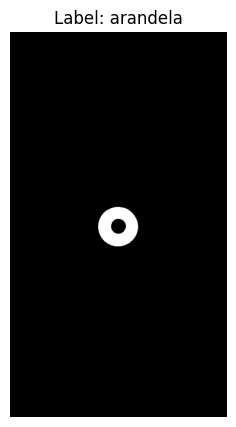

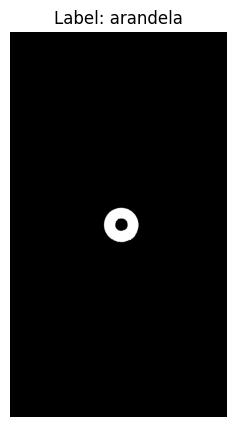

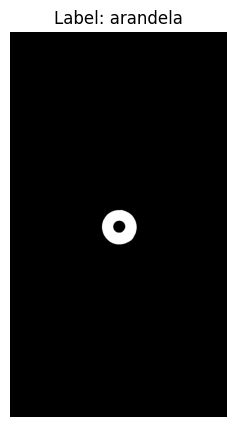

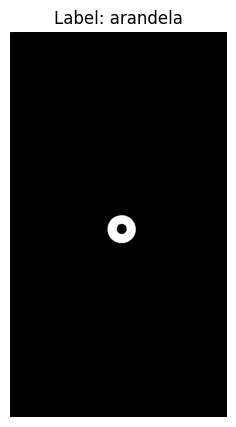

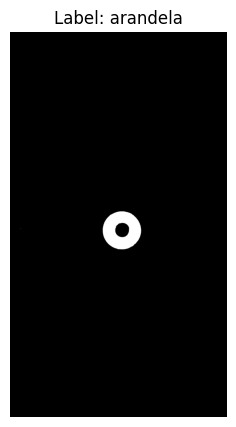

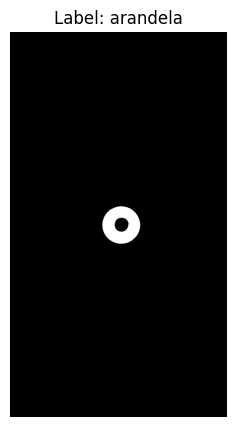

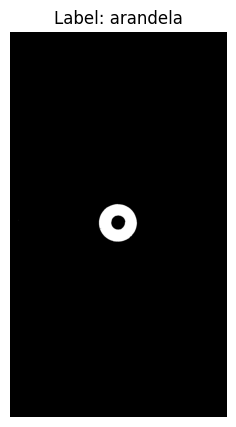

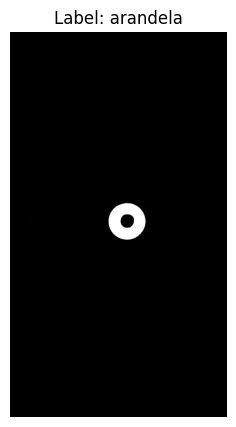

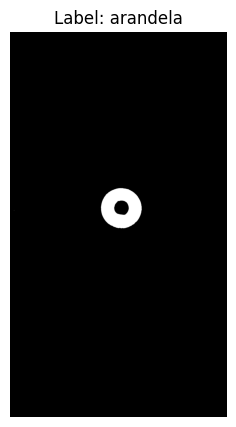

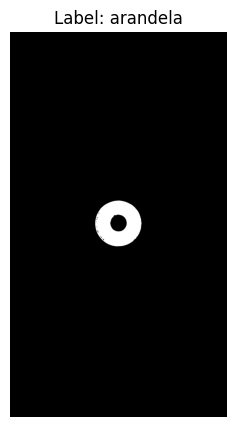

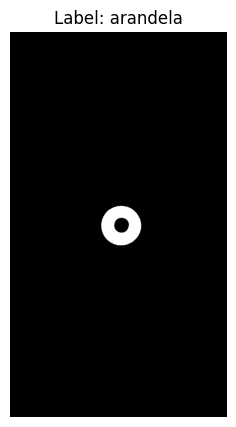

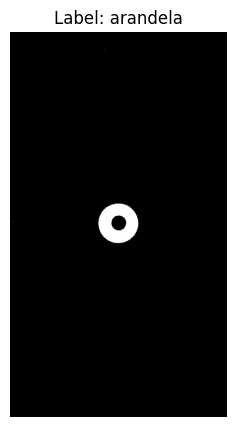

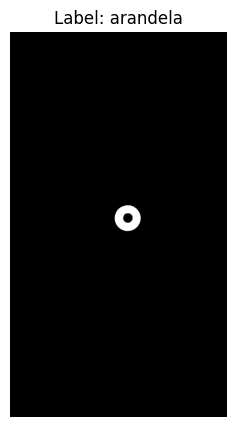

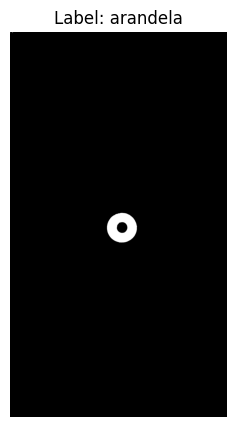

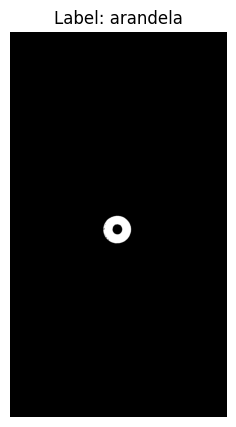

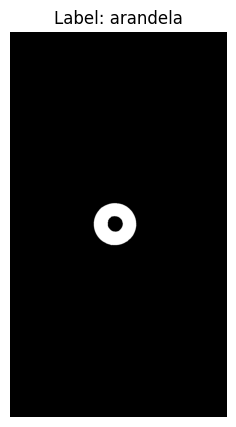

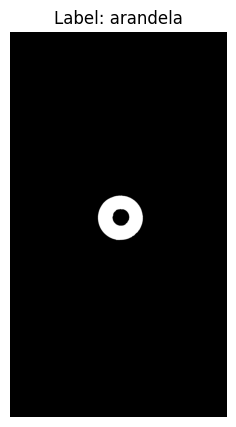

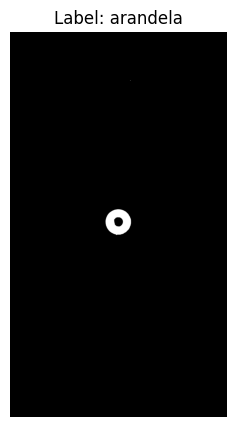

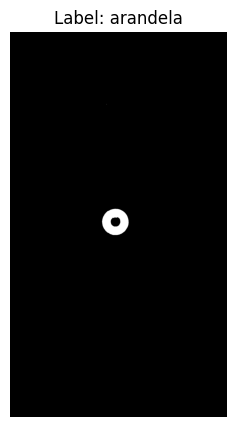

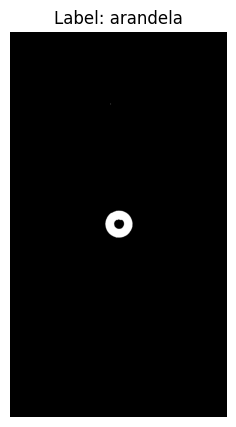

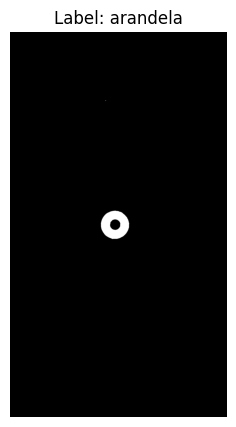

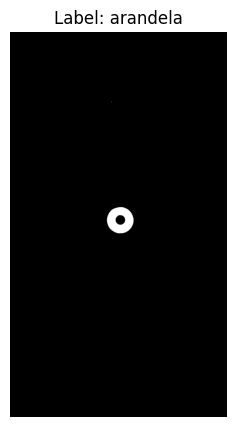

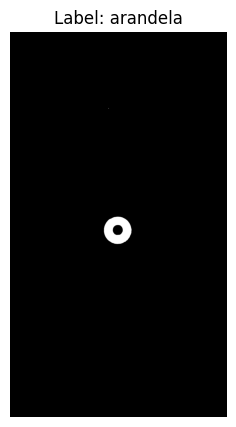

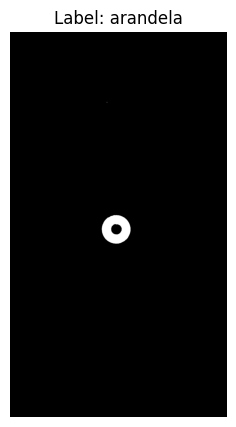

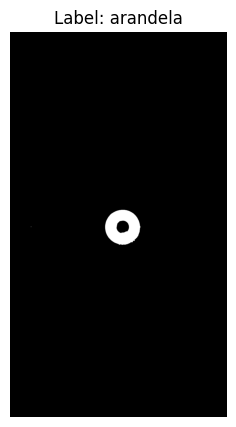

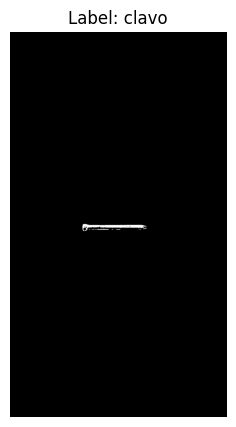

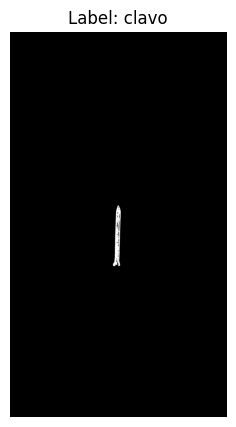

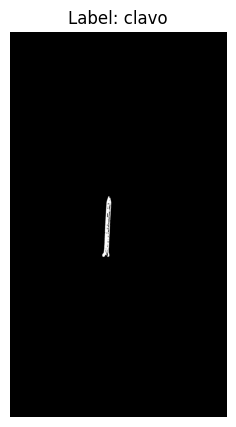

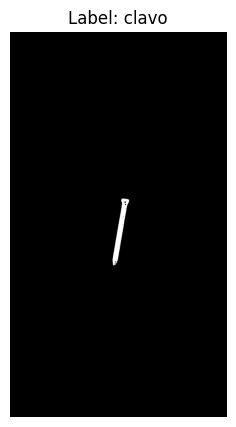

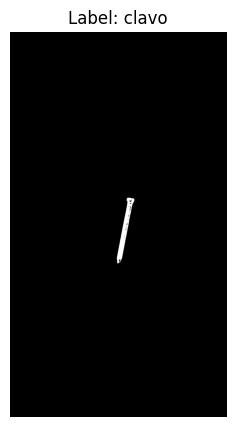

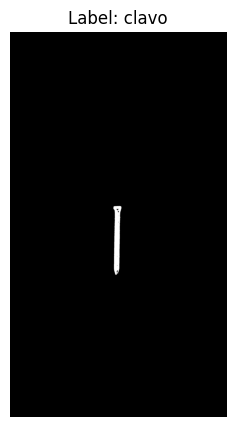

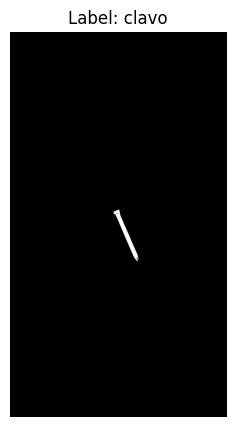

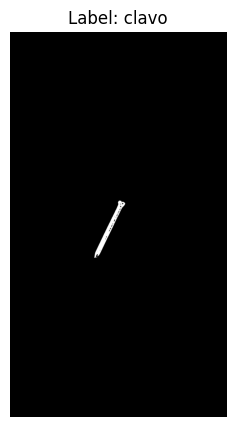

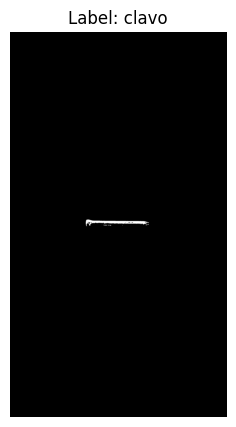

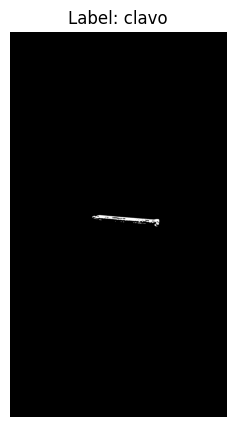

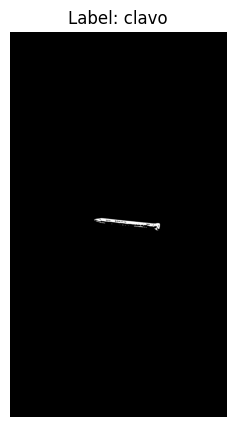

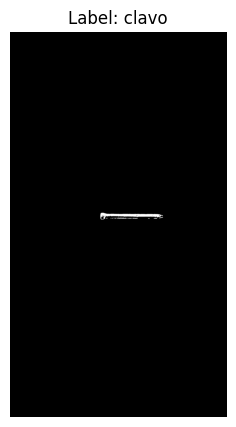

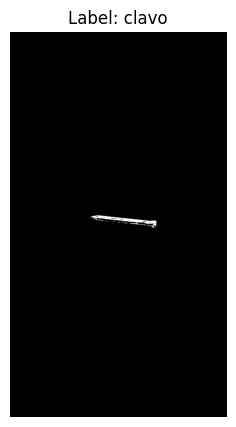

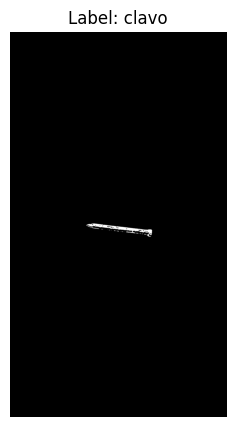

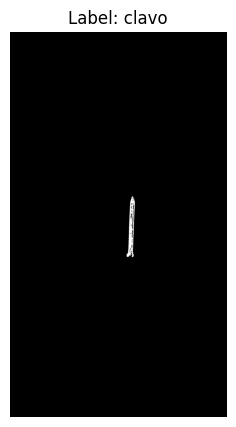

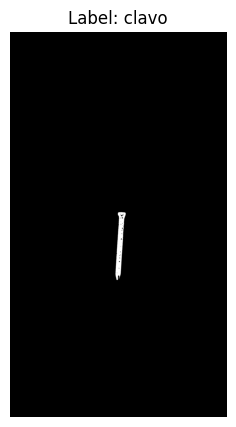

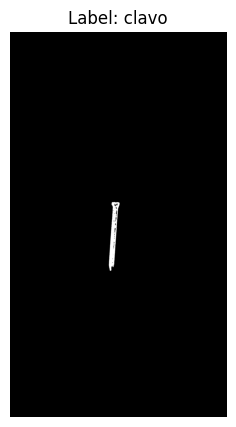

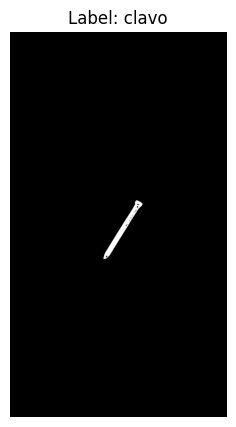

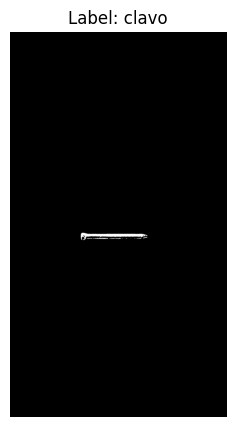

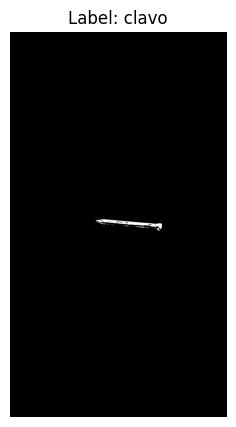

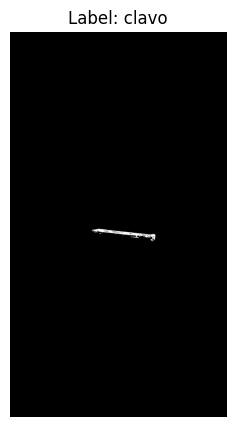

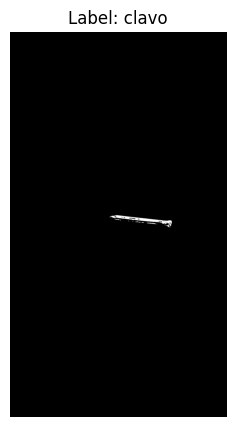

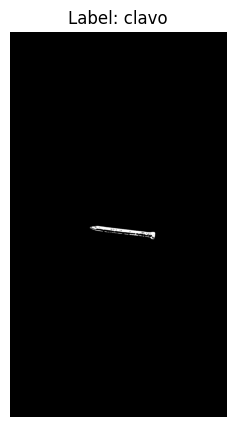

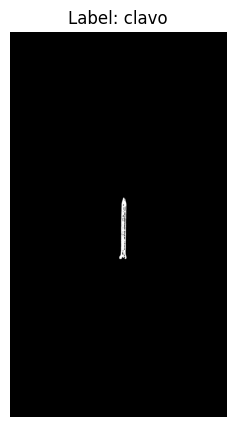

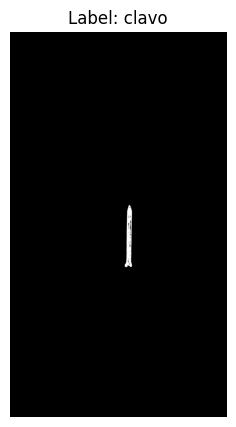

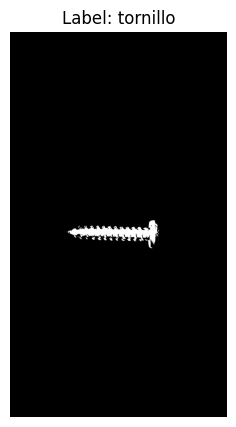

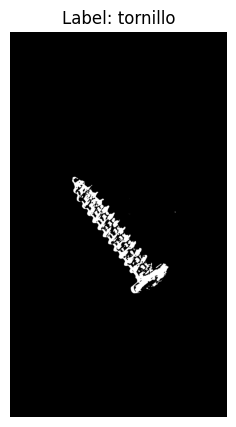

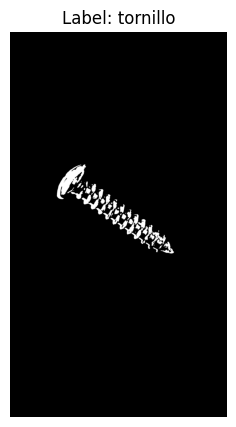

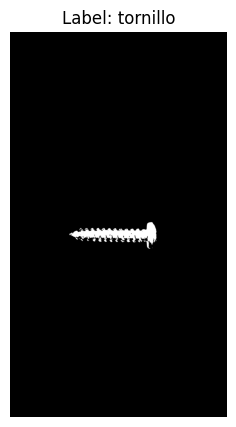

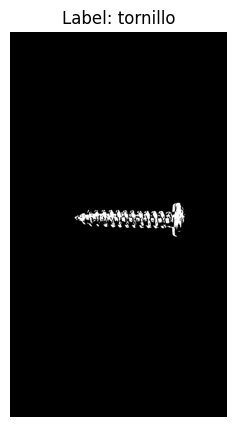

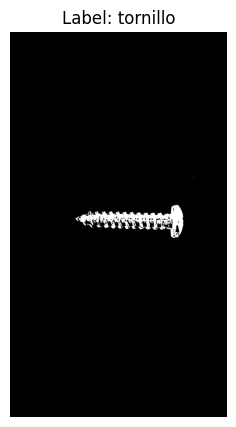

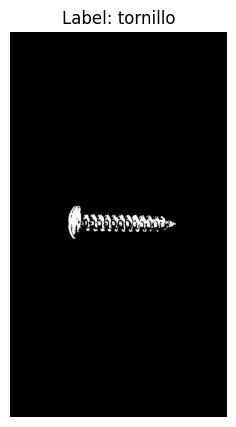

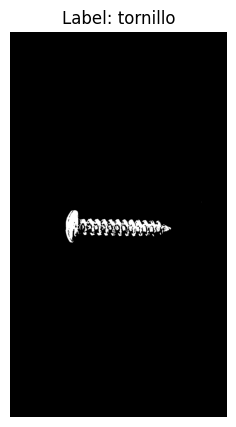

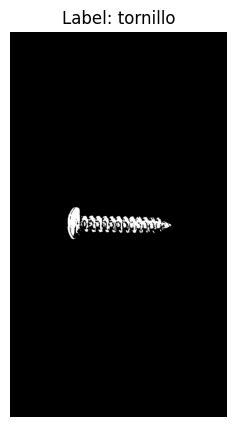

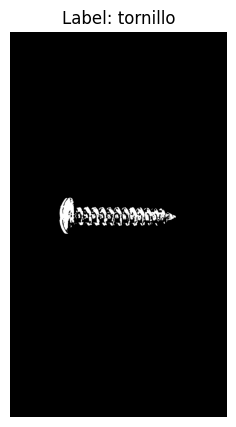

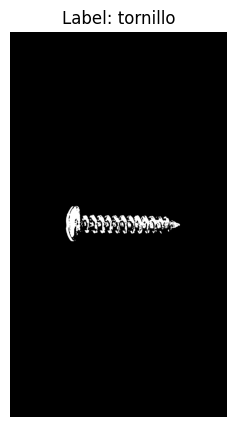

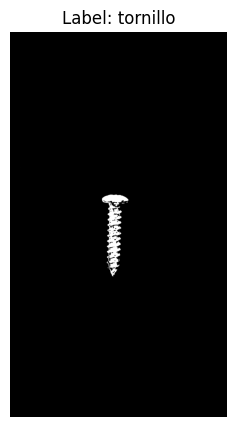

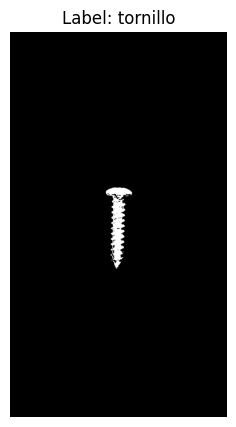

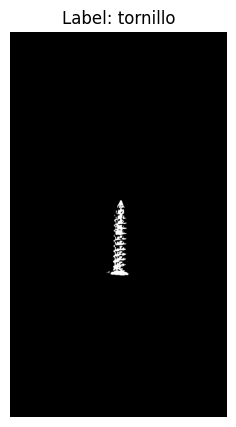

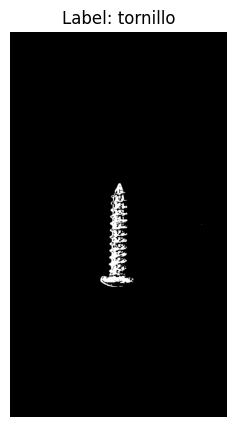

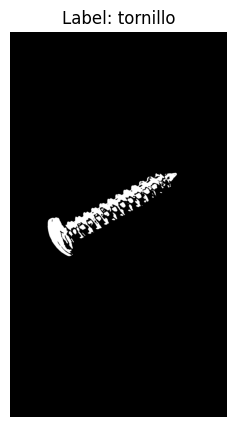

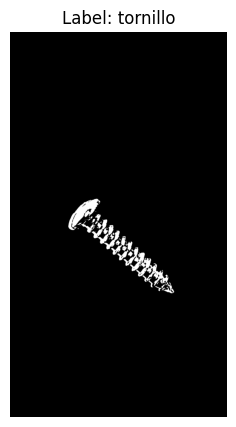

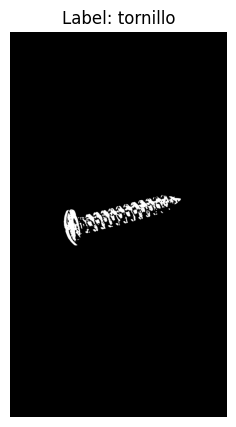

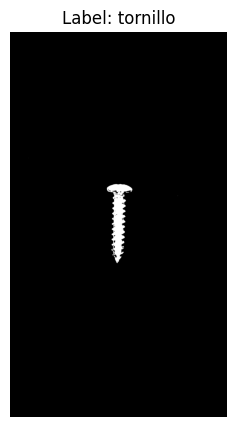

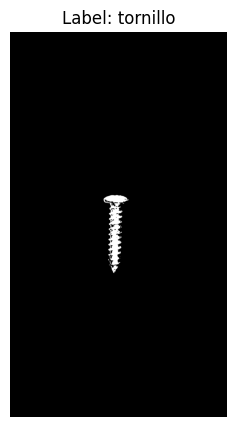

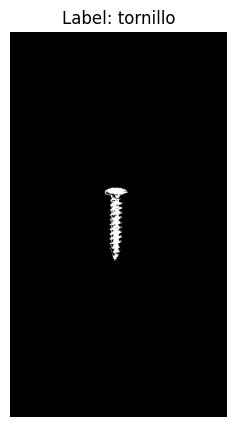

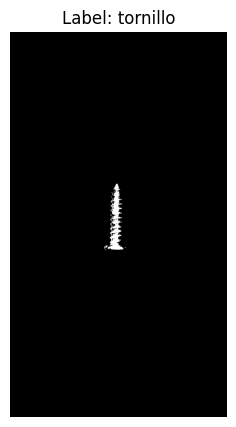

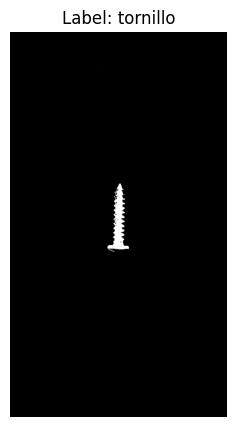

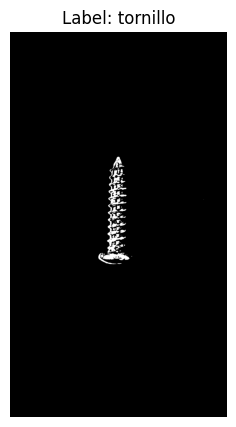

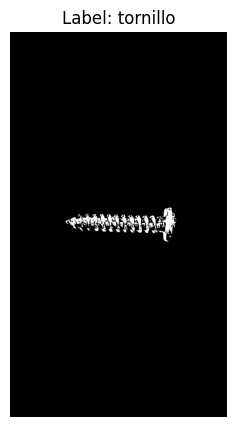

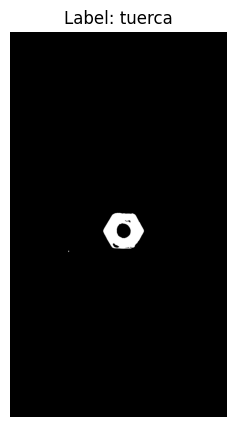

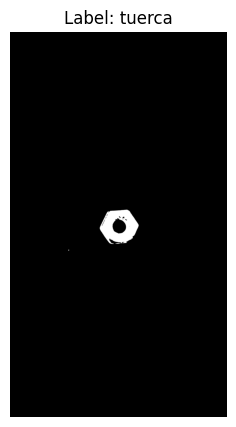

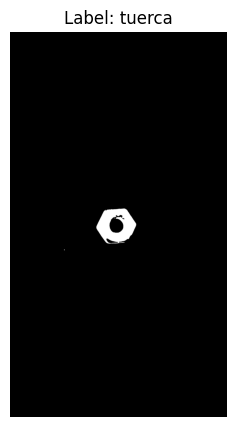

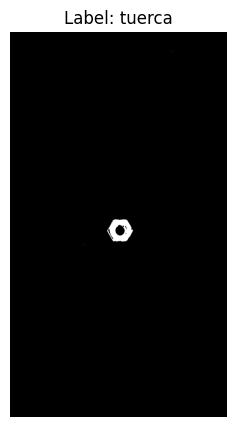

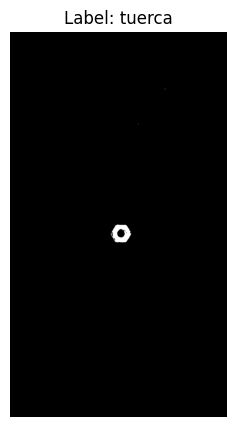

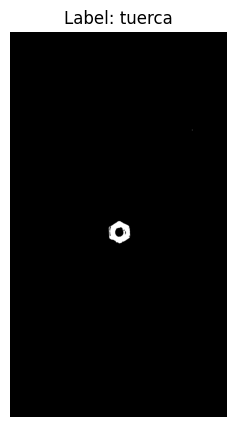

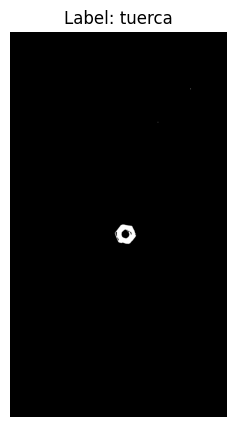

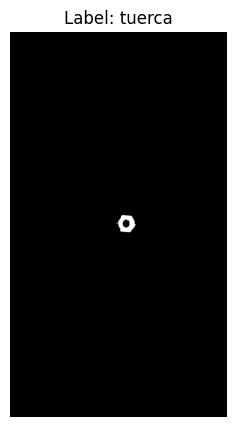

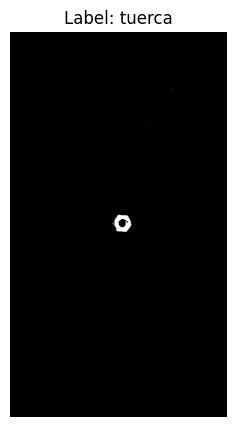

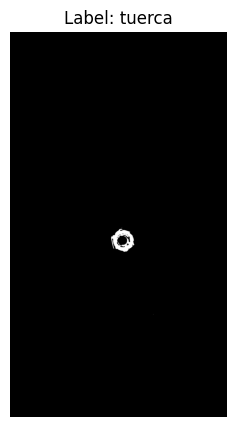

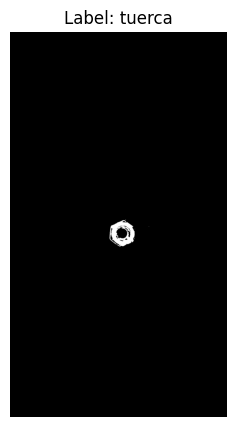

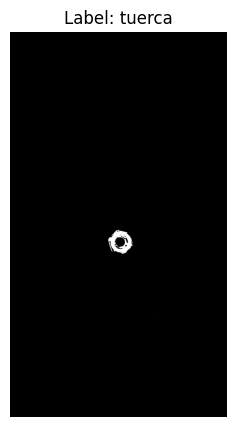

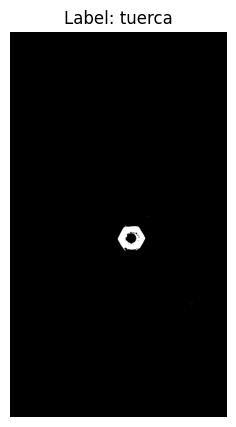

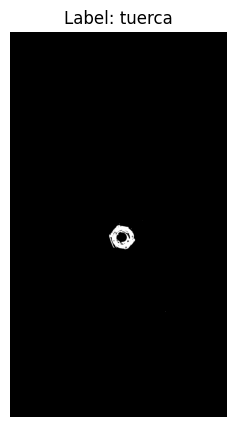

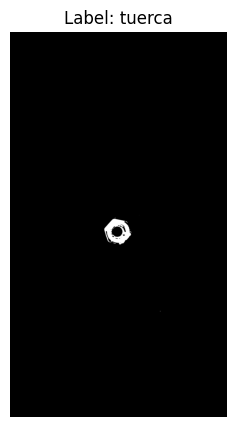

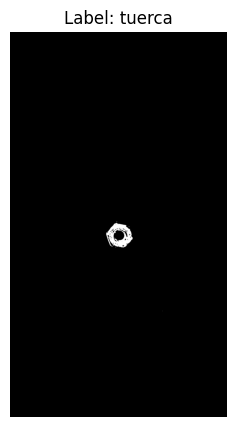

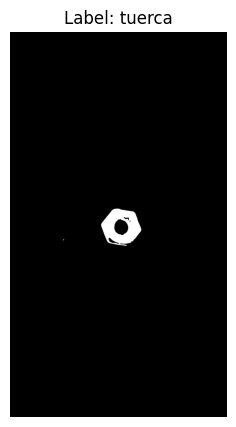

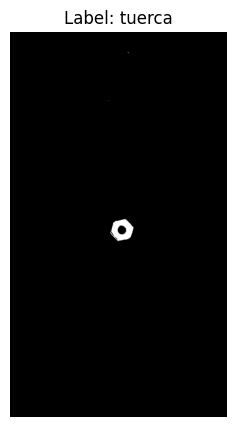

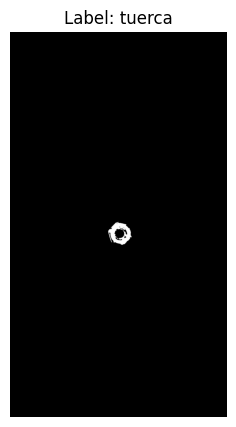

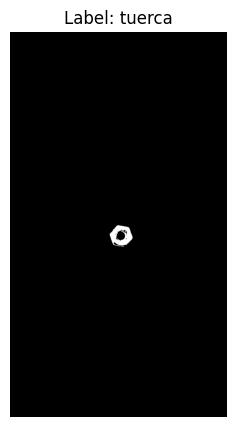

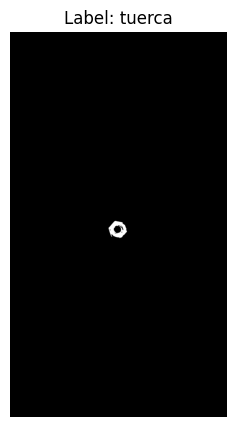

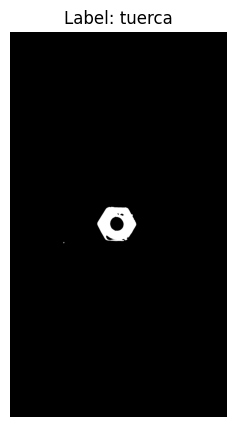

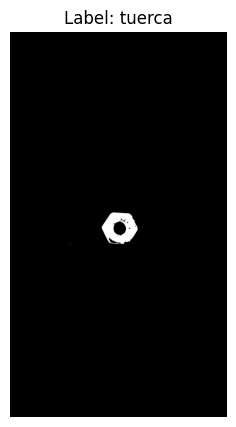

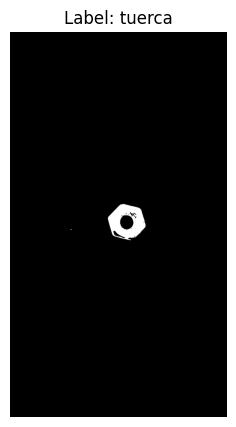

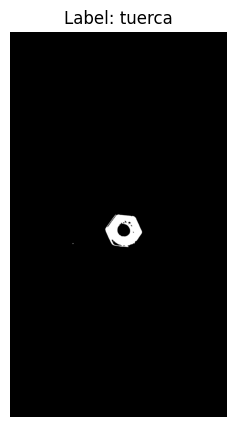

In [5]:
from skimage.filters import threshold_otsu, threshold_li
import os
from skimage import io

# Define save folder
save_folder = "images/black_and_white/li"
os.makedirs(save_folder, exist_ok=True)  # Create folder if it doesn't exist

aux_ims = []
for i, (im, label) in enumerate(zip(images, labels)):
    # Apply Otsu's threshold
    local_otsu = threshold_li(im)
    thresh_image = (im >= local_otsu).astype(np.uint8) * 255

    # Invert to obtain black background if needed
    if np.mean(thresh_image) > 127:
        thresh_image = cv2.bitwise_not(thresh_image)
        print(f"Inverting colors for {label}_{i}.jpg")

    aux_ims.append(thresh_image)

    plt.figure(figsize=(5, 5))
    plt.imshow(thresh_image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    # Save the thresholded image
    save_path = os.path.join(save_folder, f"{label}_{i}.jpg")
    io.imsave(save_path, thresh_image)

print("Thresholded images processed and saved successfully!")
images = aux_ims

# Closing Filtering

In [6]:
from skimage.morphology import dilation, closing

def apply_filter(images, filter):
    filtered_images = []
    for image in images:
        filtered = filter(image, disk(10))
        filtered_images.append(filtered)
    return filtered_images

filtered_images = apply_filter(images, closing)

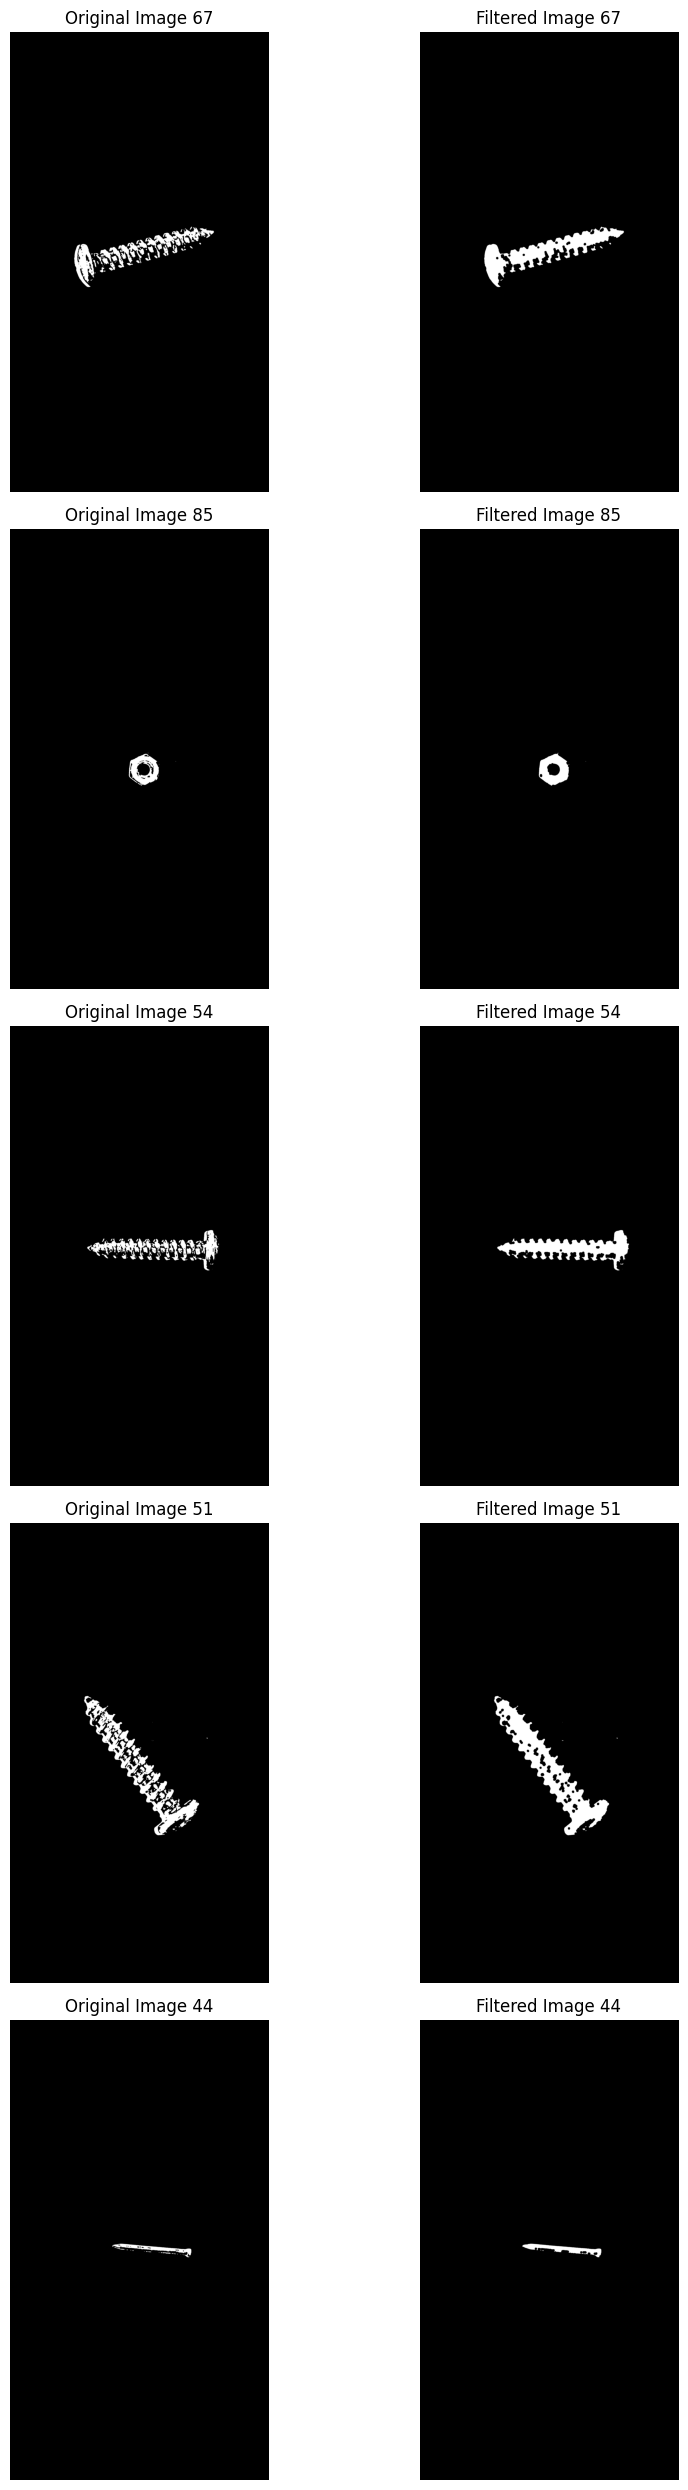

In [7]:
import random  

# Select a few random images to display
num_samples = 5  
sample_indices = random.sample(range(len(images)), num_samples)

# Plot original and filtered images side by side
fig, axes = plt.subplots(num_samples, 2, figsize=(10, 5 * num_samples))

for i, idx in enumerate(sample_indices):
    axes[i, 0].imshow(images[idx], cmap="gray")
    axes[i, 0].set_title(f"Original Image {idx}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(filtered_images[idx], cmap="gray")
    axes[i, 1].set_title(f"Filtered Image {idx}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

# Find the object's contours

In [8]:
def find_and_filter_contours(image, min_length):
    """
    Finds and filters contours based on a minimum length.

    Parameters:
        image (numpy.ndarray): Binary image.
        min_length (float): Minimum contour length to retain.

    Returns:
        list: Filtered contours.
    """
    if np.mean(image) > 127:  # Invert for white background
        image = cv2.bitwise_not(image)
        print(f"Inverting colors.")
    
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return [cnt for cnt in contours if cv2.arcLength(cnt, closed=True) >= min_length]

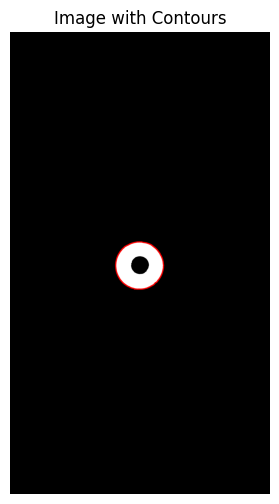

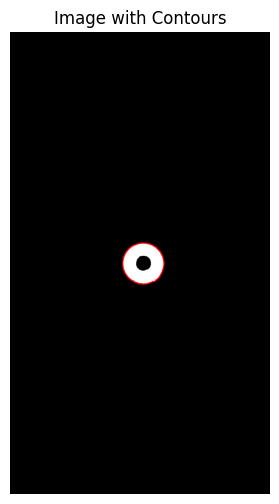

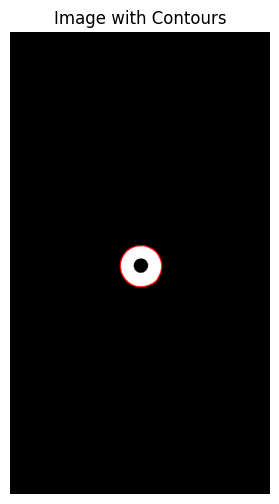

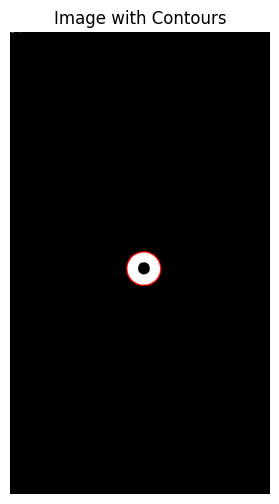

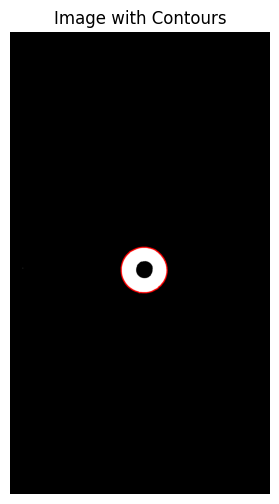

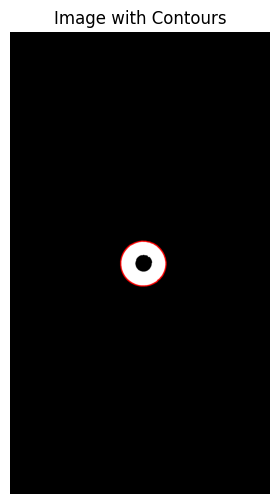

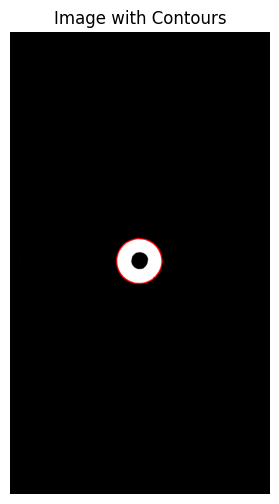

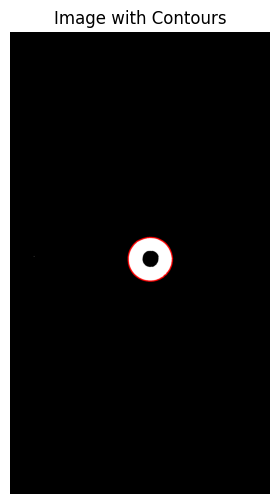

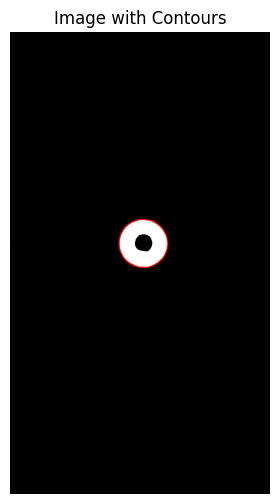

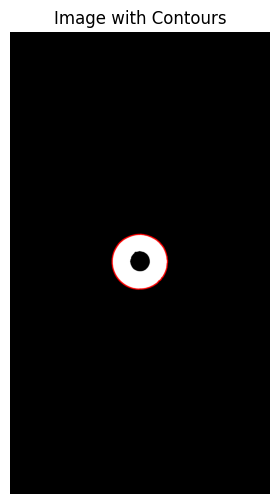

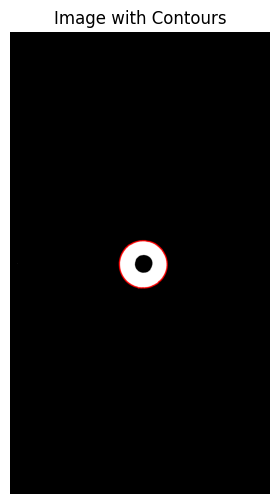

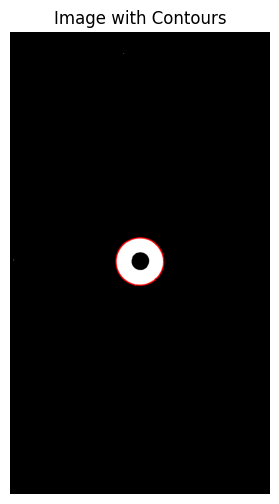

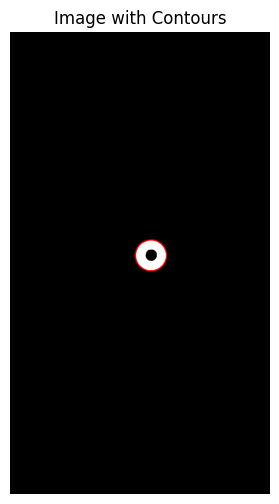

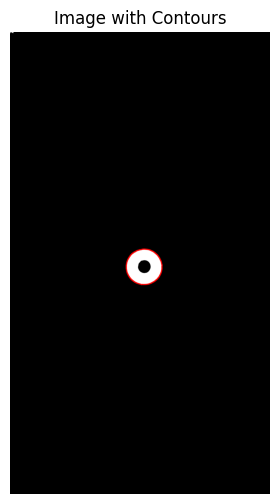

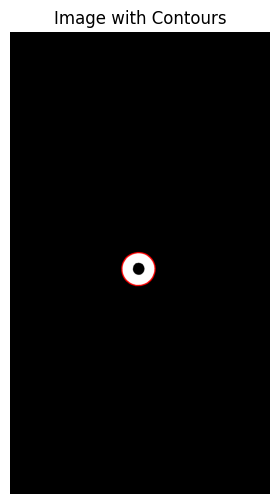

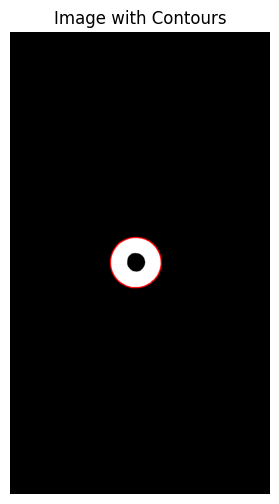

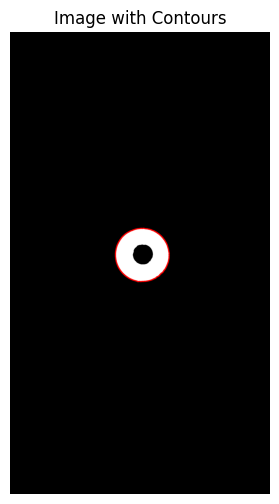

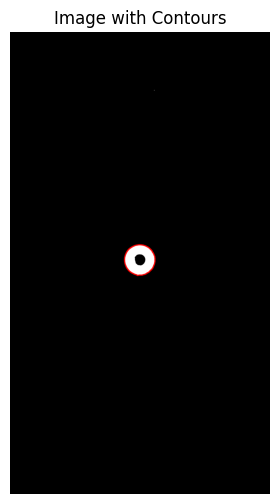

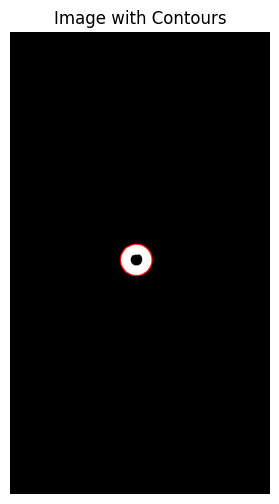

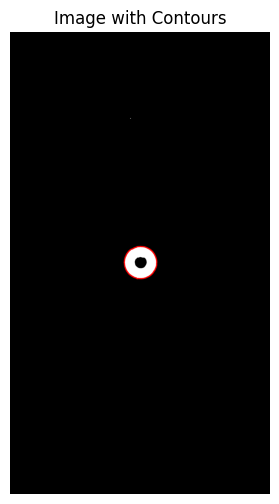

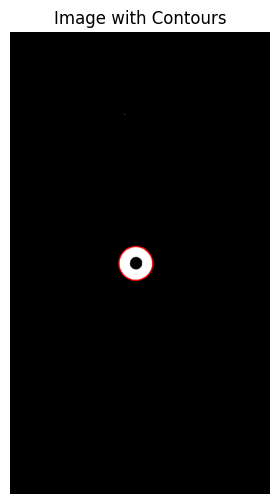

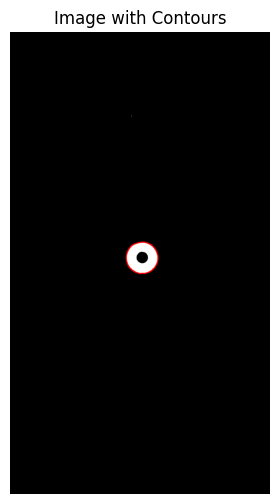

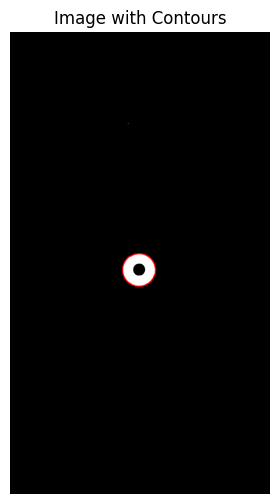

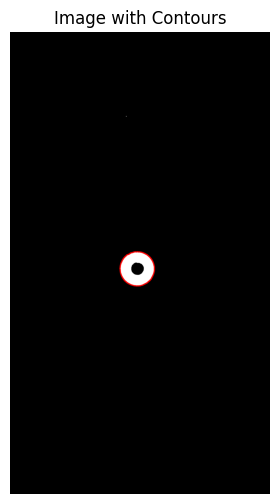

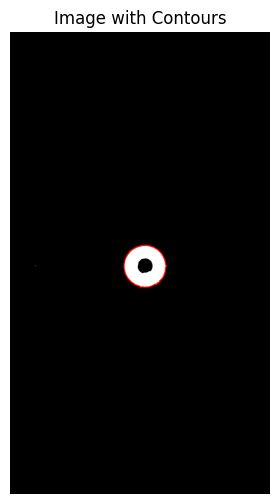

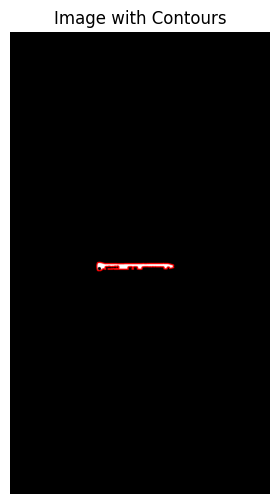

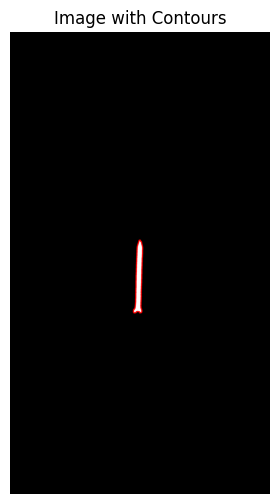

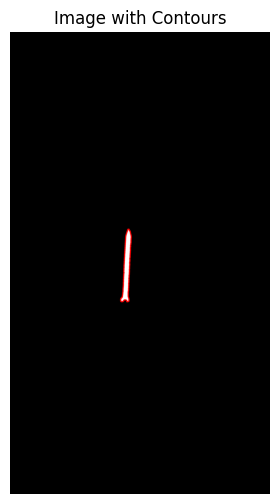

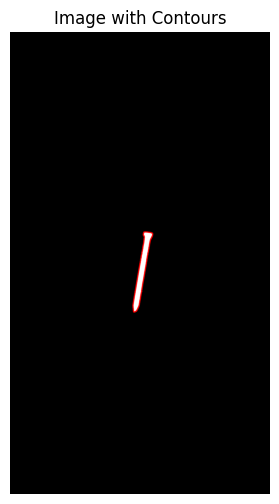

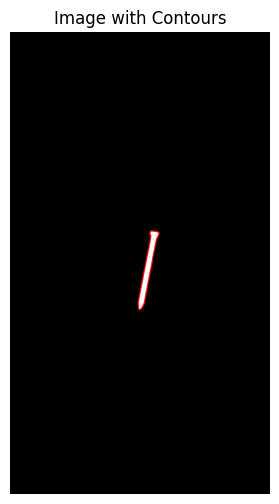

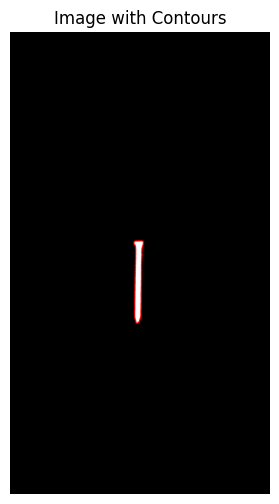

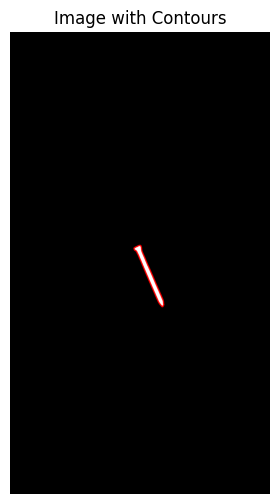

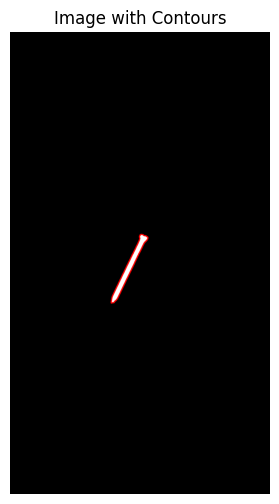

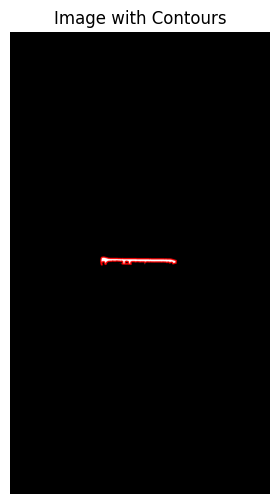

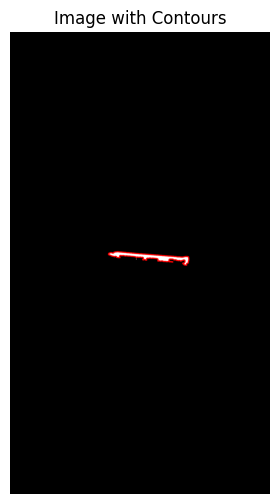

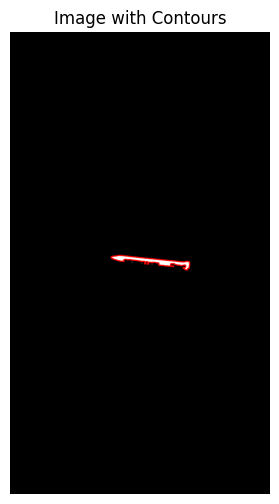

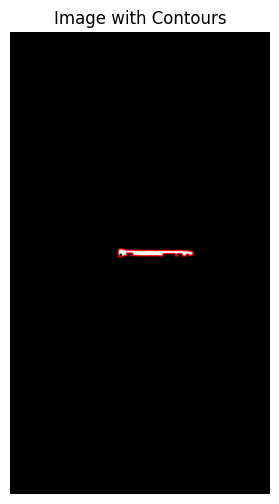

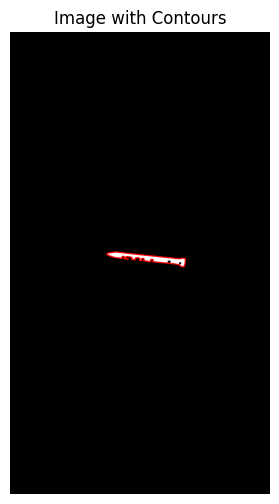

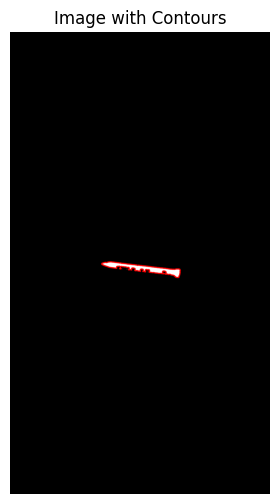

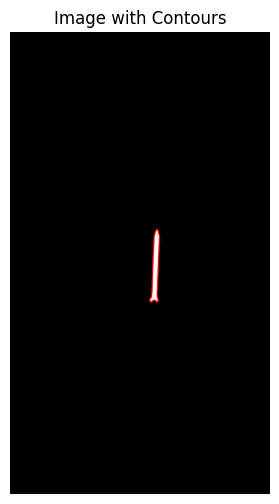

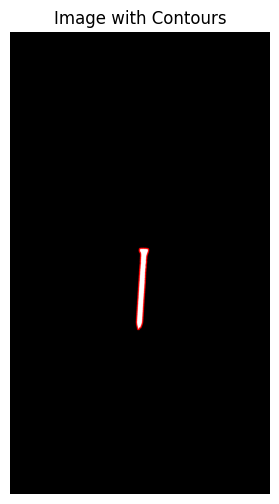

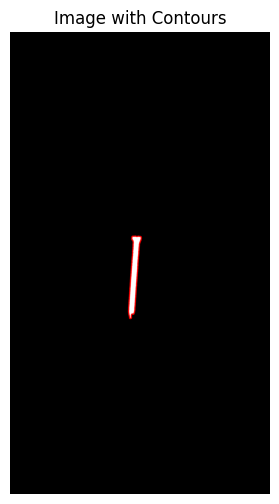

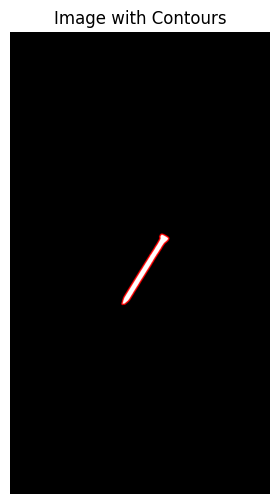

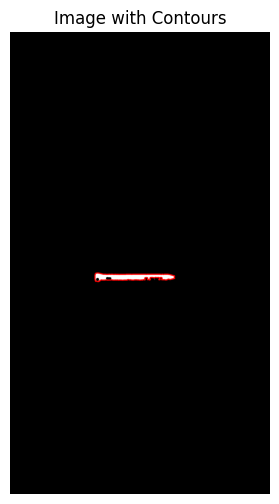

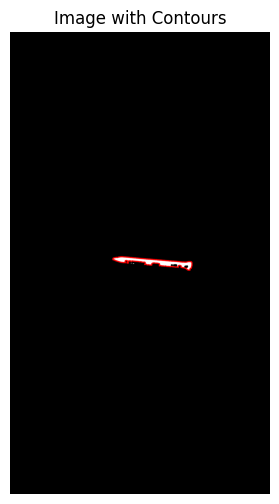

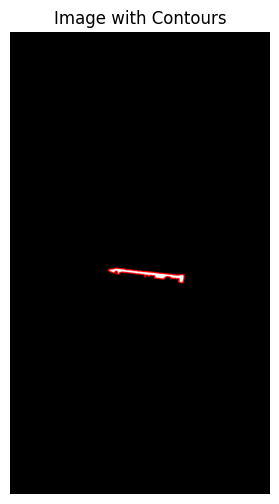

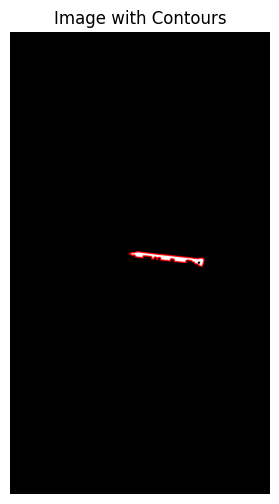

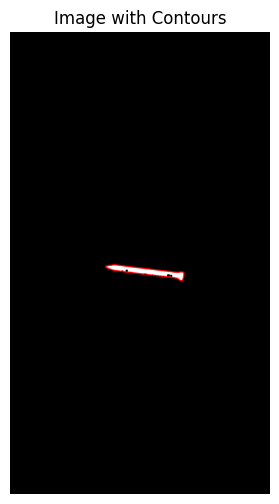

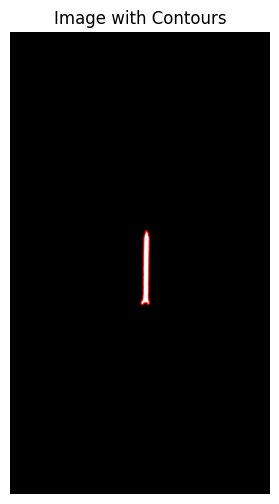

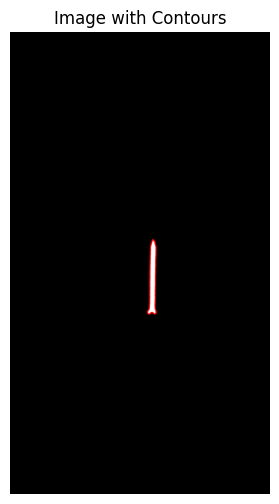

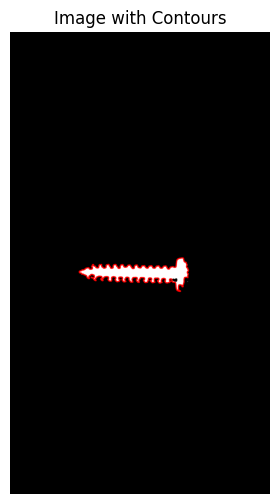

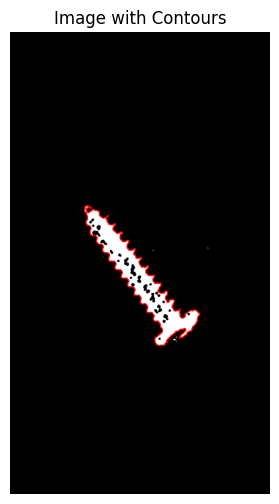

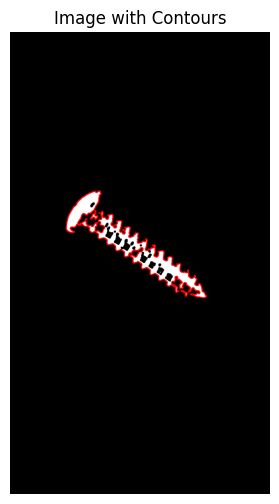

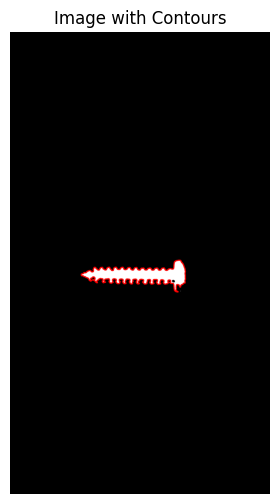

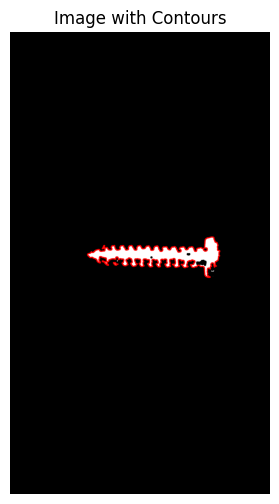

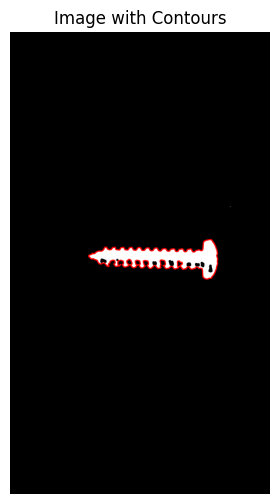

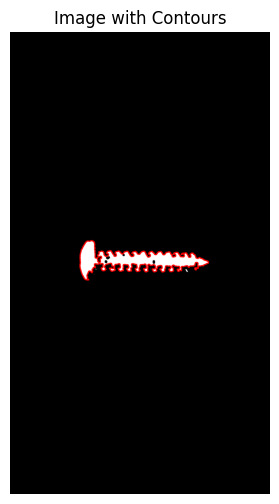

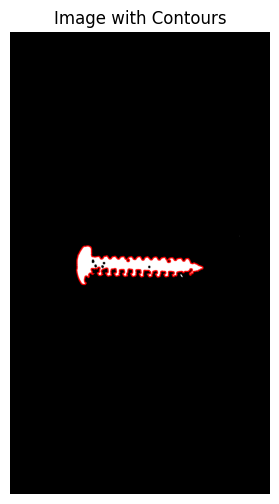

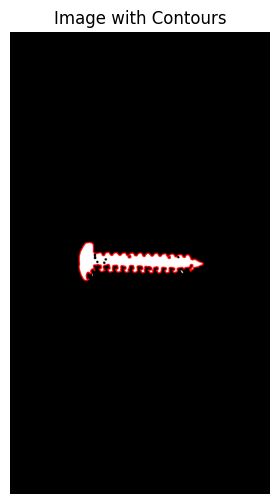

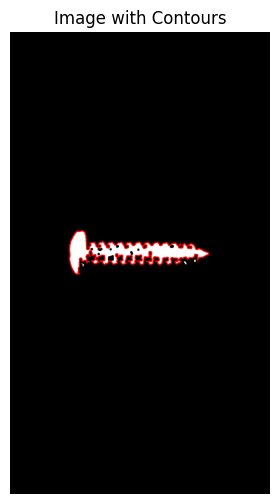

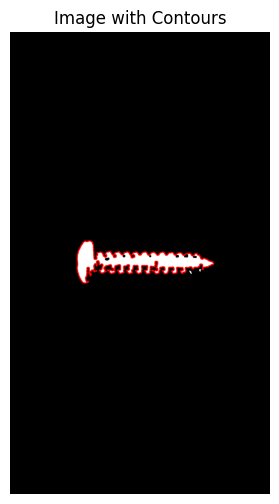

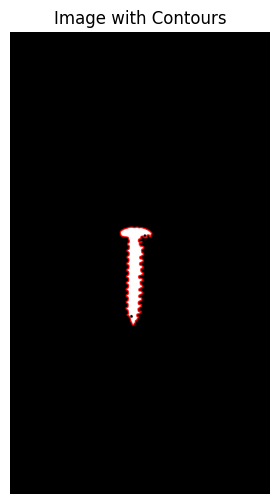

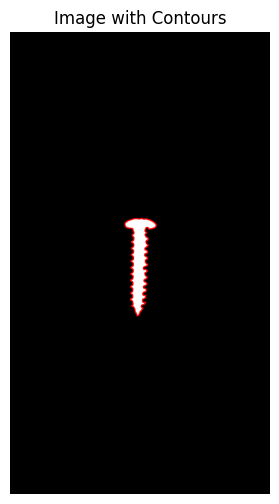

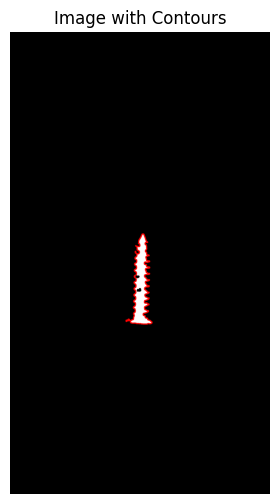

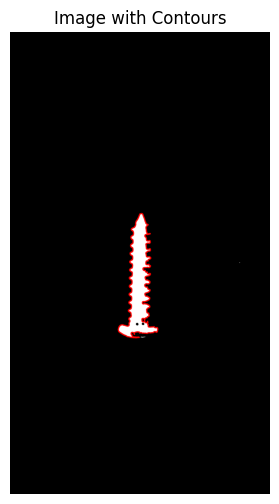

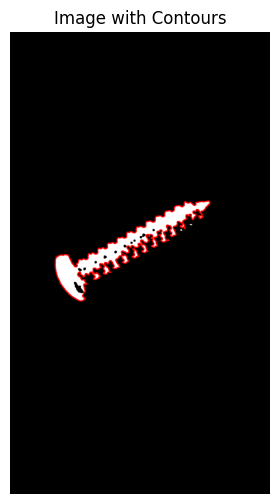

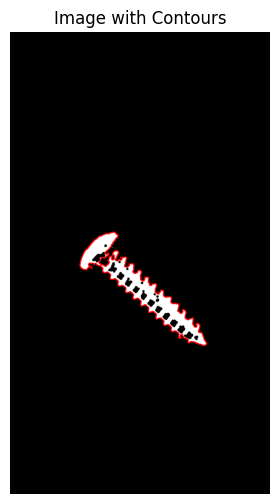

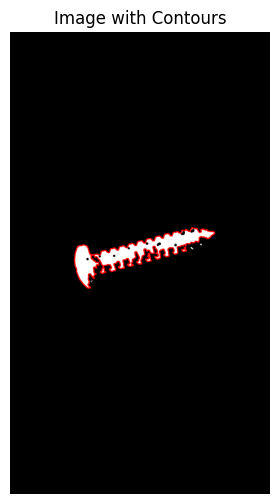

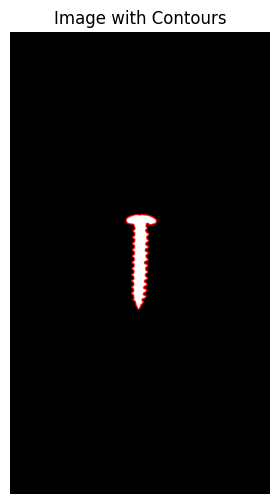

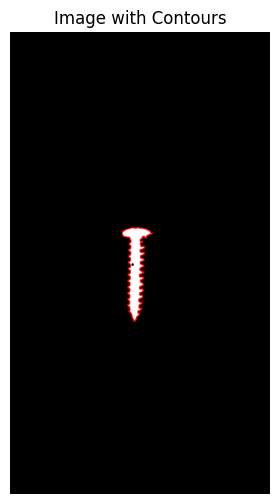

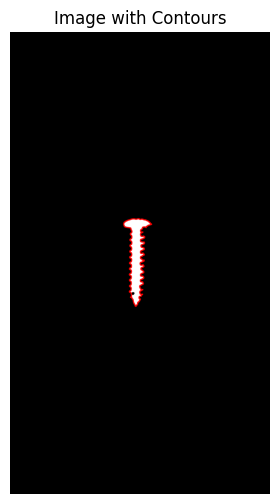

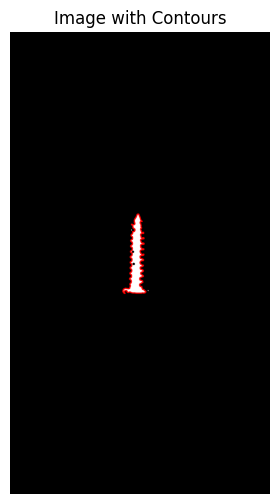

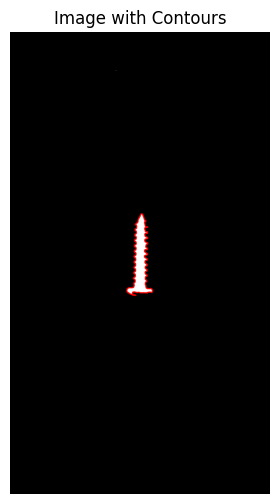

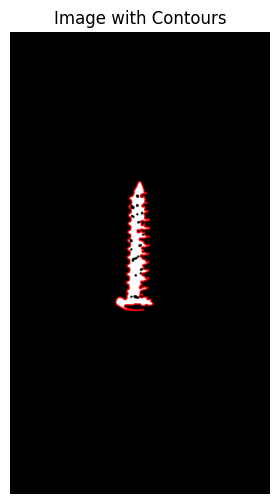

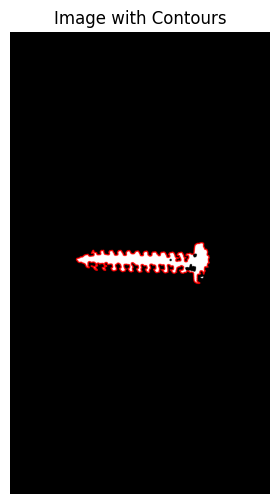

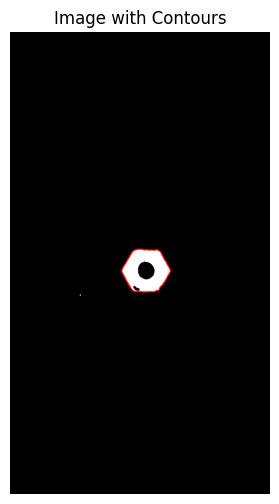

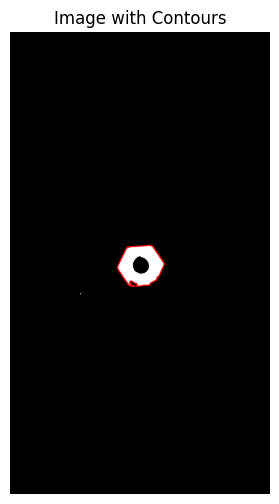

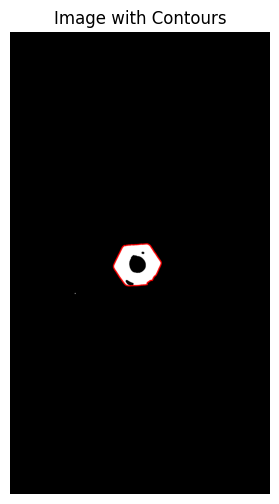

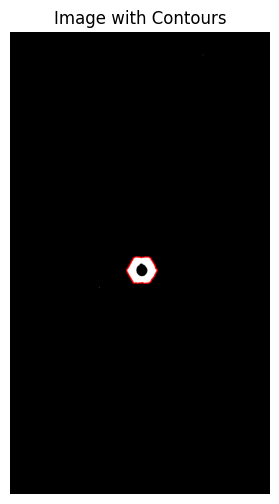

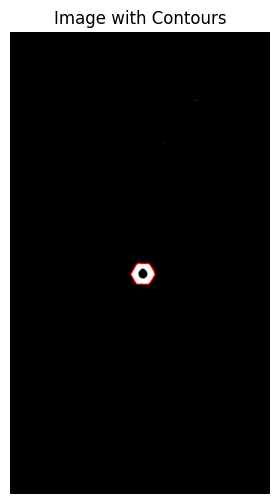

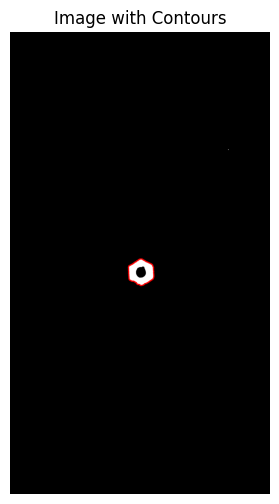

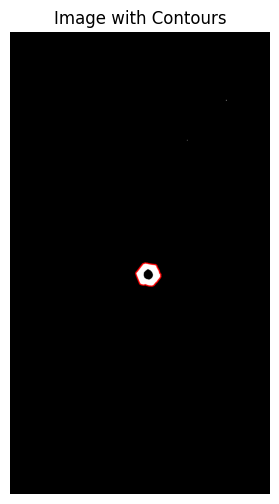

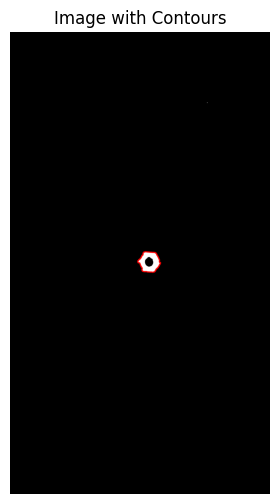

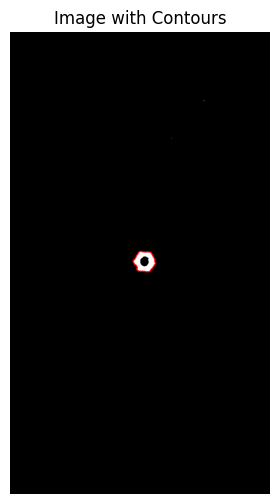

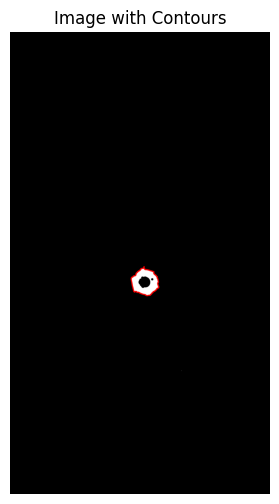

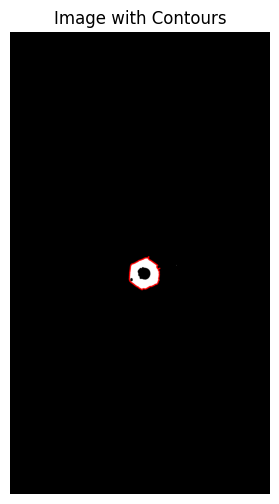

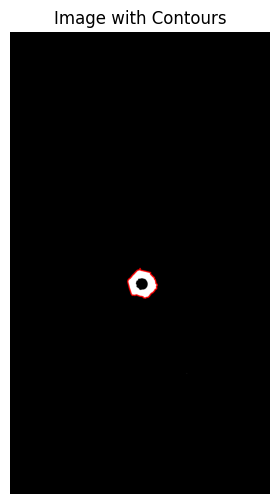

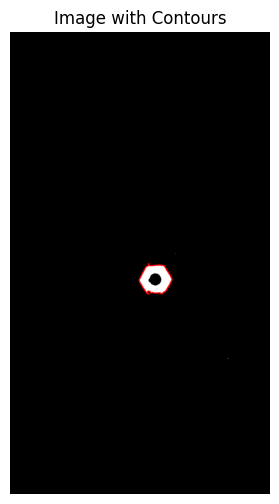

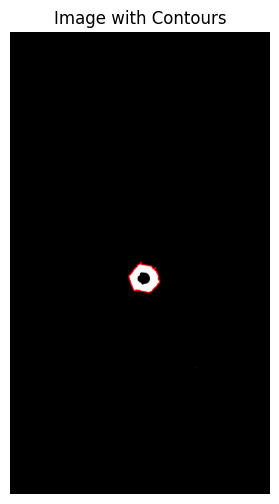

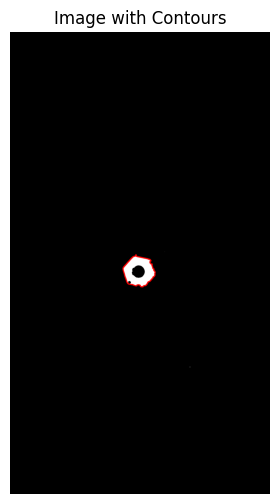

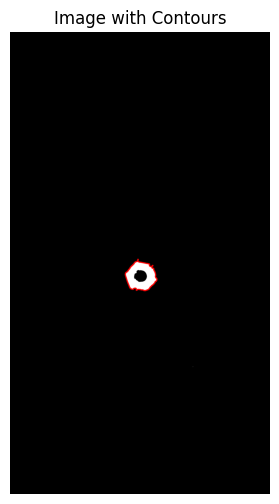

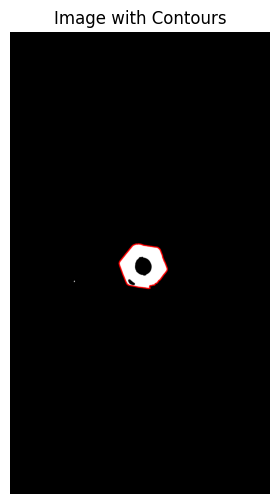

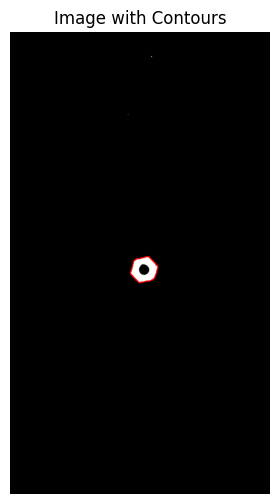

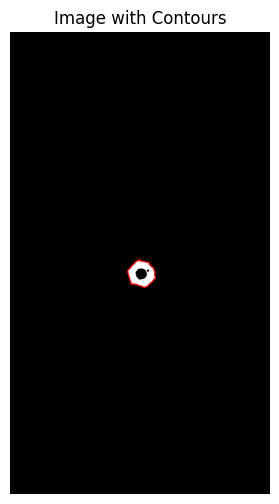

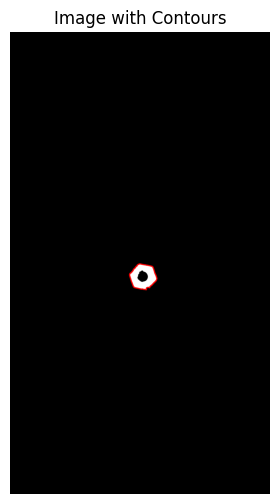

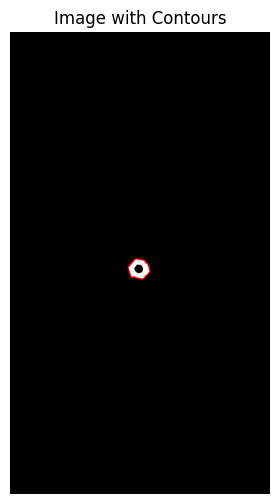

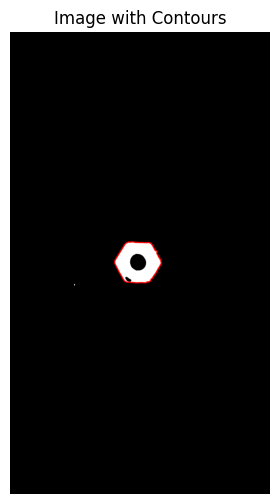

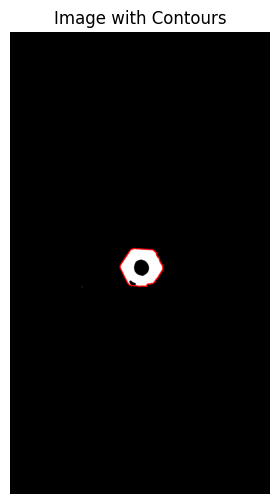

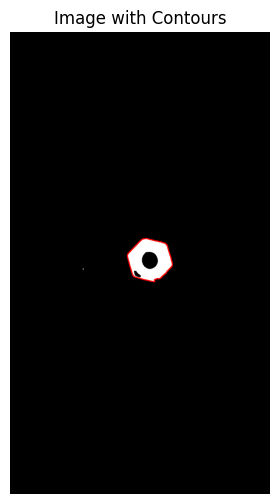

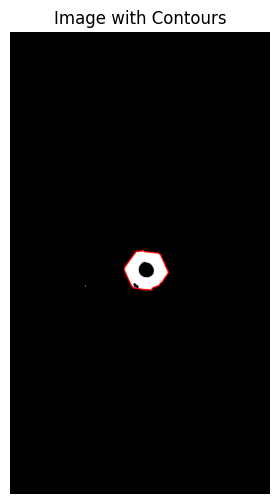

In [9]:
contours_list = []

for index, image in enumerate(filtered_images):
    contours = find_and_filter_contours(image, min_length=100)
    assert(len(contours)>0)
    contours_list.append(contours)

    img_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color contours
    cv2.drawContours(img_with_contours, contours, -1, (0, 0, 255), 10)  # Red contours, thickness=2

    # Plot the image and contours
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title('Image with Contours')
    plt.axis('off')
    plt.show()

# Crop the images around the main contour's bounding box

In [10]:
def crop_objects(images, contours_list):
    cropped_images = []
    adjusted_contours_list = []
    adjusted_hulls_list = []
    for image, contours in zip(images, contours_list):
        all_points = np.vstack(contours)
        cv2_contours = np.array(all_points, dtype=np.int32)
        # Compute convex hull of the main contour
        convex_hull = cv2.convexHull(cv2_contours)

        # Get bounding rectangle around the convex hull
        x, y, w, h = cv2.boundingRect(convex_hull)

        # Crop the image using the bounding rectangle
        cropped = image[y:y+h, x:x+w]

        # Adjust the contours by shifting them to the cropped image coordinate system
        adjusted_contours = [cnt - np.array([x, y]) for cnt in cv2_contours]
        adjusted_hull = convex_hull - np.array([x, y])

        cropped_images.append(cropped)
        adjusted_contours_list.append(adjusted_contours)
        adjusted_hulls_list.append(adjusted_hull)

    return cropped_images, adjusted_contours_list, adjusted_hulls_list

In [16]:
cropped_images, adjusted_contours_list, adjusted_hulls_list = crop_objects(images, contours_list)

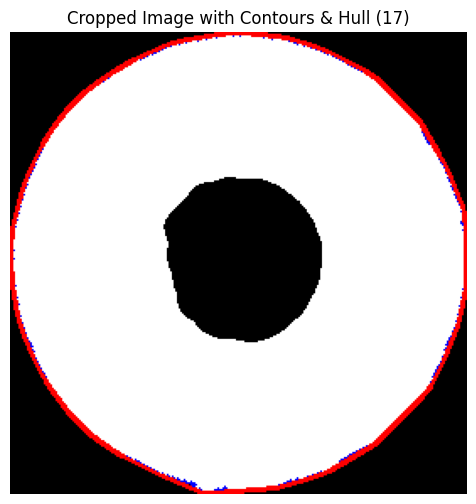

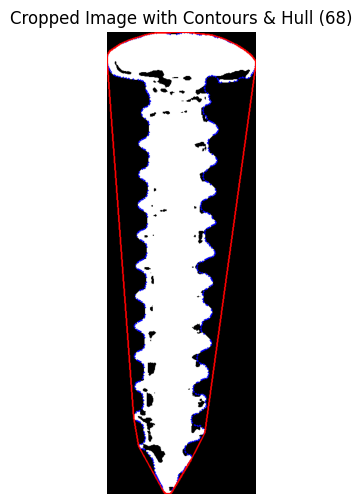

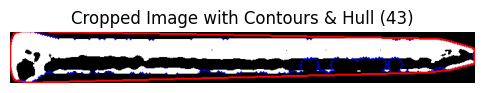

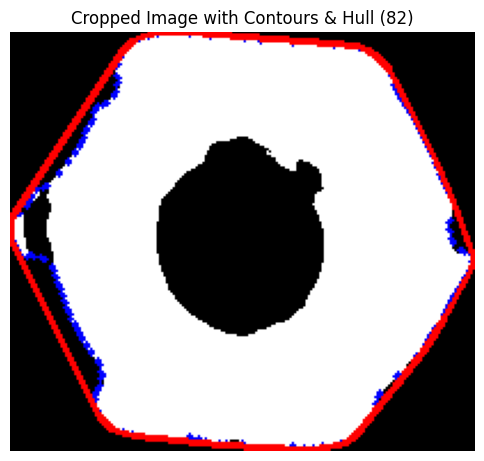

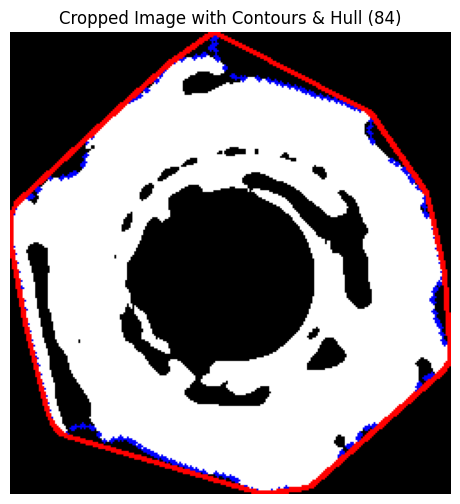

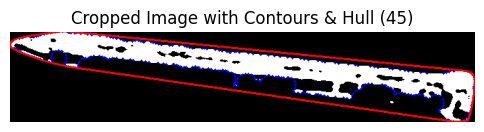

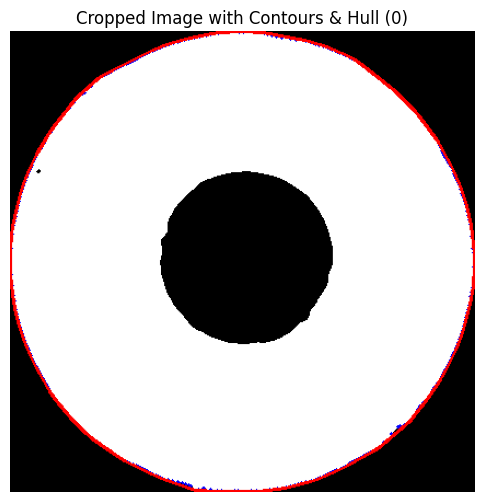

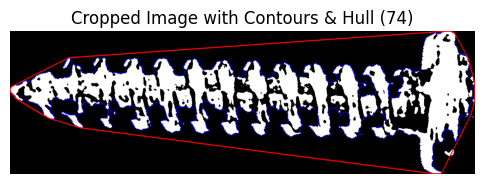

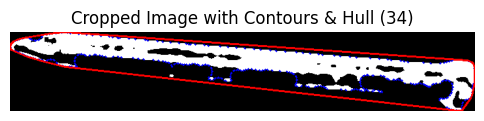

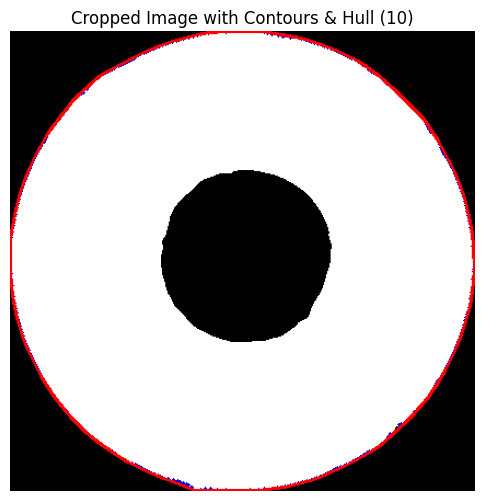

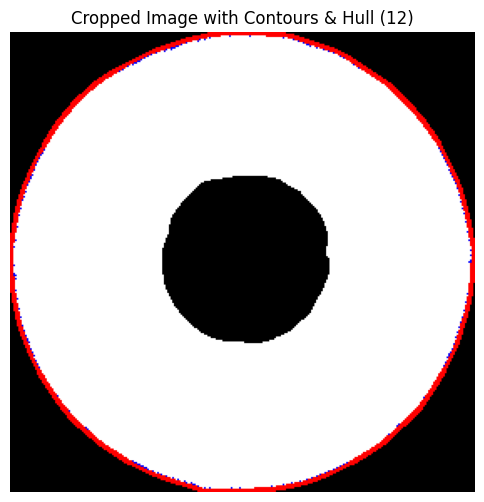

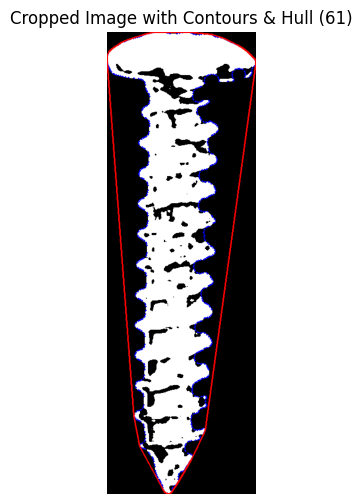

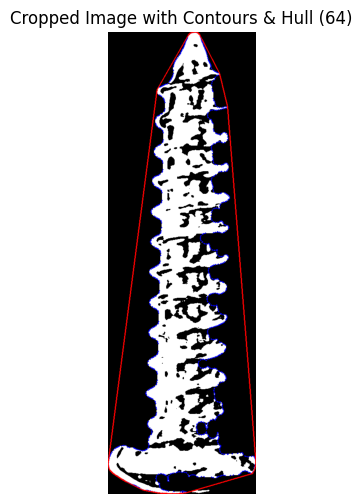

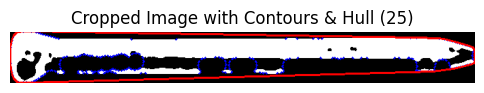

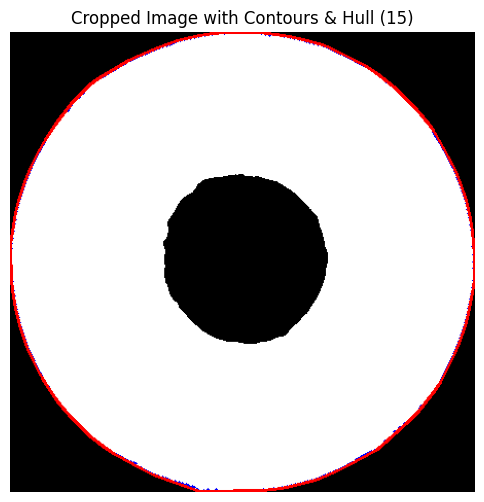

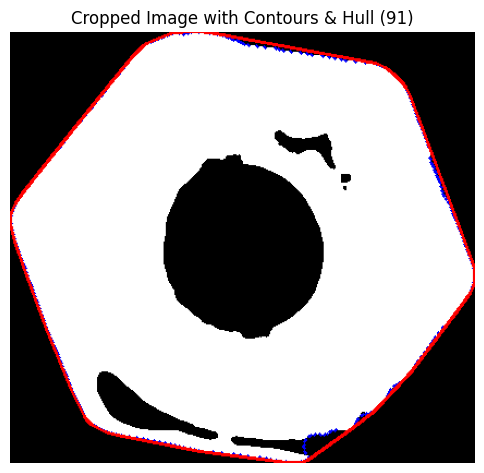

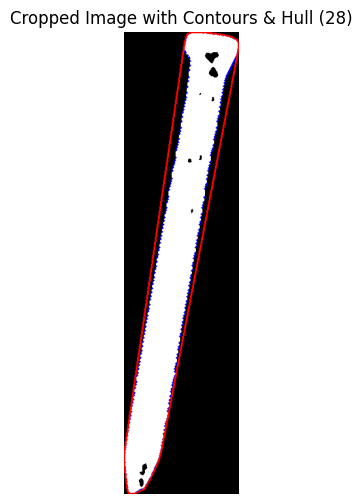

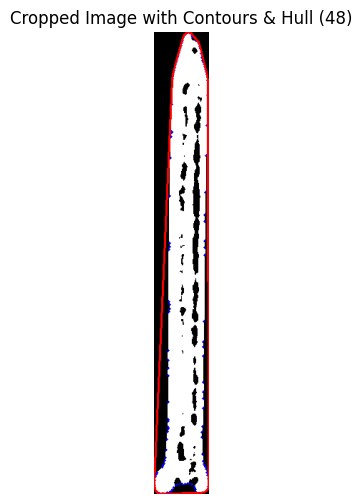

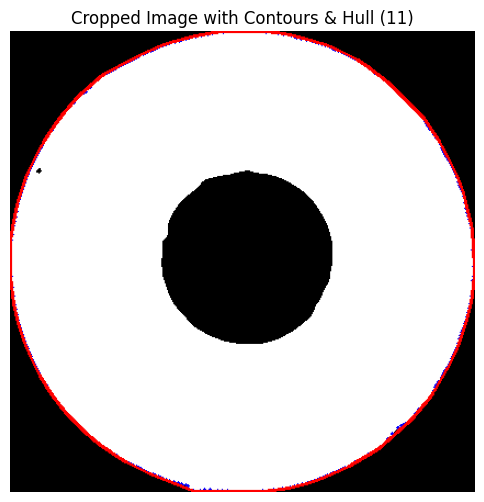

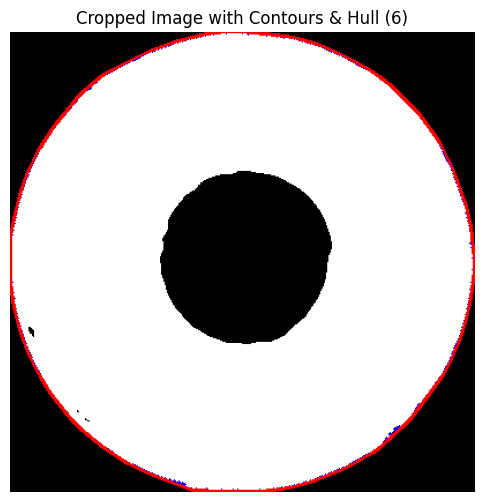

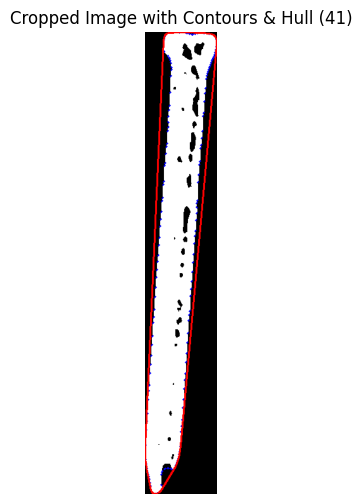

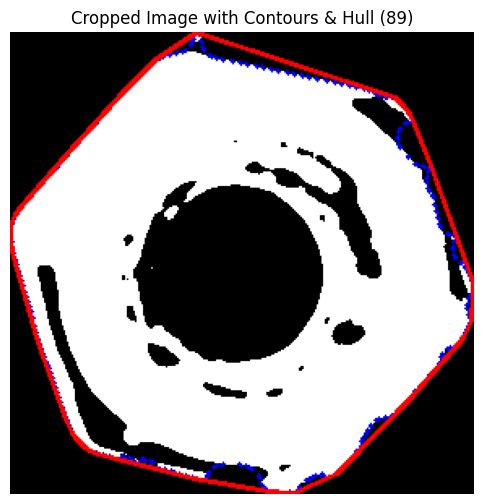

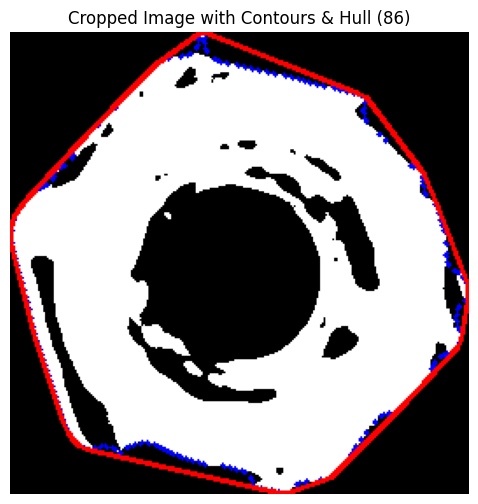

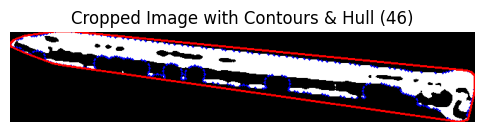

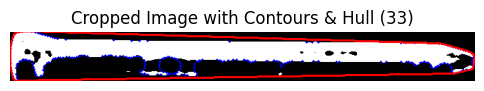

In [17]:
import random  

# Select a few random samples for visualization
num_samples = 25  # Adjust as needed
sample_indices = random.sample(range(len(images)), num_samples)

# Plot cropped images with contours and hulls
for idx in sample_indices:
    cropped = cropped_images[idx]
    contours = adjusted_contours_list[idx]
    hull = adjusted_hulls_list[idx]

    # Convert grayscale image to BGR for colored contour drawing
    img_with_contours = cv2.cvtColor(cropped, cv2.COLOR_GRAY2BGR)

    # Draw adjusted contours in blue
    cv2.drawContours(img_with_contours, contours, -1, (255, 0, 0), 2)  # Blue contours

    # Draw convex hull in red
    cv2.drawContours(img_with_contours, [hull], -1, (0, 0, 255), 2)  # Red hull

    # Display the result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title(f'Cropped Image with Contours & Hull ({idx})')
    plt.axis('off')
    plt.show()

# Compute features

In [106]:
import math
from skimage.measure import moments_central, moments_normalized, moments_hu
import pandas as pd

# List to store feature vectors
feature_list = []

for i, (cropped, contours, hull) in enumerate(zip(cropped_images, adjusted_contours_list, adjusted_hulls_list)):
    contours = np.array(contours)

    # Compute OpenCV Hu Moments
    moments_cv2 = cv2.moments(hull)
    hu_moments_cv2 = cv2.HuMoments(moments_cv2).flatten()

    # Compute Area and Perimeter
    area = cv2.contourArea(contours)
    perimeter = cv2.arcLength(contours, True)

    # Compute Circularity
    circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

    # Compute Convex Hull Features
    hull_area = cv2.contourArea(hull)
    hull_perimeter = cv2.arcLength(hull, closed=True)

    solidity = area / hull_area if hull_area != 0 else 0
    convexity = hull_perimeter / perimeter if perimeter != 0 else 0

    # Compute Min Enclosing Circle
    (x, y), radius = cv2.minEnclosingCircle(hull)
    circle_area = math.pi * (radius ** 2)

    area_ratio = hull_area / circle_area if circle_area != 0 else 0

    # Compute Ellipse Fitting
    if len(hull) >= 5:  # cv2.fitEllipse requires at least 5 points
        ellipse = cv2.fitEllipse(hull)
        major_axis = max(ellipse[1])
        minor_axis = min(ellipse[1])
        axis_aspect_ratio = minor_axis / major_axis if major_axis != 0 else 0
        eccentricity = np.sqrt(1 - (minor_axis ** 2 / major_axis ** 2)) if major_axis != 0 else 0
    else:
        major_axis, minor_axis, axis_aspect_ratio, eccentricity = 0, 0, 0, 0

    # Compute Perimeter/Area Ratio
    per_area_aspect_ratio = perimeter / hull_area if hull_area != 0 else 0

    # Compute skimage Hu Moments
    if cropped is not None and cropped.size > 0:
        mu = moments_central(cropped)
        nu = moments_normalized(mu)
        hu_moments_skimage = moments_hu(nu).flatten()
    else:
        hu_moments_skimage = np.zeros(7)

    # Append all features to list
    feature_vector = np.concatenate((
        hu_moments_cv2, hu_moments_skimage, 
        [area, perimeter, circularity, solidity, convexity, 
         area_ratio, axis_aspect_ratio, eccentricity, per_area_aspect_ratio]
    ))
    feature_list.append(feature_vector)

# Define column names
columns = [
    "Hu1_cv2", "Hu2_cv2", "Hu3_cv2", "Hu4_cv2", "Hu5_cv2", "Hu6_cv2", "Hu7_cv2",
    "Hu1_skimage", "Hu2_skimage", "Hu3_skimage", "Hu4_skimage", "Hu5_skimage", "Hu6_skimage", "Hu7_skimage",
    "Area", "Perimeter", "Circularity", "Solidity", "Convexity",
    "Circle_Area_Ratio", "Axis_Aspect_Ratio", "Eccentricity", "Perimeter_Area_Ratio"
]

# Create a DataFrame
df_features = pd.DataFrame(feature_list, columns=columns)

df_features['Label'] = labels
df_features

Hu1_cv2       Hu2_cv2       Hu3_cv2       Hu4_cv2       Hu5_cv2  \
0   0.159166  1.435787e-06  1.004526e-07  3.464306e-12  8.152394e-22   
1   0.159193  4.920576e-06  5.213626e-07  1.815232e-10  1.675099e-18   
2   0.159175  2.509548e-06  6.942501e-08  1.159679e-11  9.623031e-21   
3   0.159173  3.693264e-06  1.510087e-07  1.068632e-11 -1.142819e-20   
4   0.159165  8.530944e-07  1.432727e-07  3.548086e-12  1.887791e-21   
..       ...           ...           ...           ...           ...   
95  0.160083  4.985509e-05  1.050259e-05  8.051619e-09  1.919173e-15   
96  0.160062  6.410124e-05  1.017659e-06  8.109516e-10  2.253565e-17   
97  0.160101  9.368443e-05  2.697476e-06  4.842514e-09  4.006792e-16   
98  0.159952  3.474019e-05  3.359146e-07  1.756337e-09 -2.201841e-17   
99  0.159962  3.857737e-05  4.576626e-06  8.725946e-10  5.460643e-17   

         Hu6_cv2       Hu7_cv2  Hu1_skimage   Hu2_skimage   Hu3_skimage  ...  \
0   2.584481e-15  1.873996e-21     0.000826  5.612799e-11  1.317540e-14  ...   
1   3.057102e-13 -5.589945e-19     0.000812  9.740852e-11  4.161317e-14  ...   
2   1.012614e-14  3.958843e-21     0.000794  6.191904e-11  7.964434e-15  ...   
3  -1.827926e-14 -7.326670e-21     0.000805  1.327095e-10  1.141050e-14  ...   
4   2.642355e-15 -1.683966e-21     0.000821  3.529324e-11  1.669742e-14  ...   
..           ...           ...          ...           ...           ...  ...   
95 -6.975219e-12  1.341217e-15     0.000974  5.484100e-09  3.744565e-12  ...   
96 -2.064571e-12  5.905834e-18     0.000854  2.985159e-09  1.058292e-13  ...   
97 -4.553148e-11 -3.818016e-16     0.000886  6.151858e-09  3.194285e-13  ...   
98 -2.874919e-12  3.653916e-17     0.000886  3.724381e-09  3.090549e-13  ...   
99 -5.269584e-12  7.674908e-18     0.000870  5.682762e-09  3.097651e-13  ...   

        Area    Perimeter  Circularity  Solidity  Convexity  \
0   139056.5  1404.864128     0.885386  0.994952   0.944203   
1   104282.5  1225.869179     0.872033  0.991321   0.939776   
2   105572.0  1218.798113     0.893090  0.995371   0.948610   
3    69845.0   998.631592     0.880105  0.993033   0.942517   
4   128869.5  1346.923003     0.892636  0.995539   0.948070   
..       ...          ...          ...       ...        ...   
95   24900.5   630.825463     0.786320  0.963567   0.924435   
96  114444.0  1324.739237     0.819487  0.983559   0.933508   
97   95978.5  1214.212327     0.818078  0.983900   0.931223   
98  111489.0  1303.994071     0.823931  0.986196   0.934868   
99   99419.0  1247.910808     0.802255  0.978043   0.926298   

    Circle_Area_Ratio  Axis_Aspect_Ratio  Eccentricity  Perimeter_Area_Ratio  \
0            0.982189           0.992937      0.118642              0.010052   
1            0.960464           0.987940      0.154837              0.011653   
2            0.969938           0.989119      0.147119              0.011491   
3            0.982532           0.989743      0.142858              0.014198   
4            0.980298           0.994641      0.103386              0.010405   
..                ...                ...           ...                   ...   
95           0.848671           0.967720      0.252027              0.024411   
96           0.867095           0.960103      0.279647              0.011385   
97           0.859983           0.946196      0.323595              0.012447   
98           0.863485           0.953183      0.302394              0.011535   
99           0.846796           0.943054      0.332638              0.012276   

       Label  
0   arandela  
1   arandela  
2   arandela  
3   arandela  
4   arandela  
..       ...  
95    tuerca  
96    tuerca  
97    tuerca  
98    tuerca  
99    tuerca  

[100 rows x 24 columns]

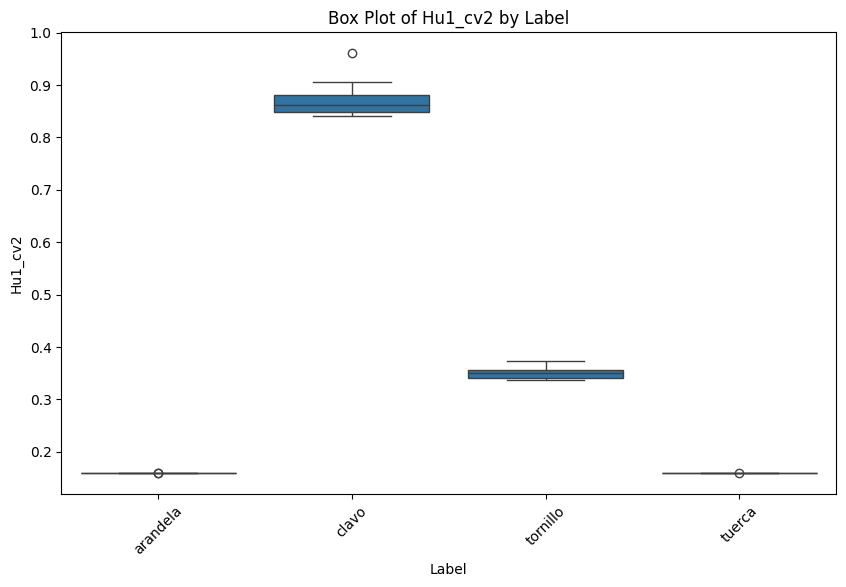

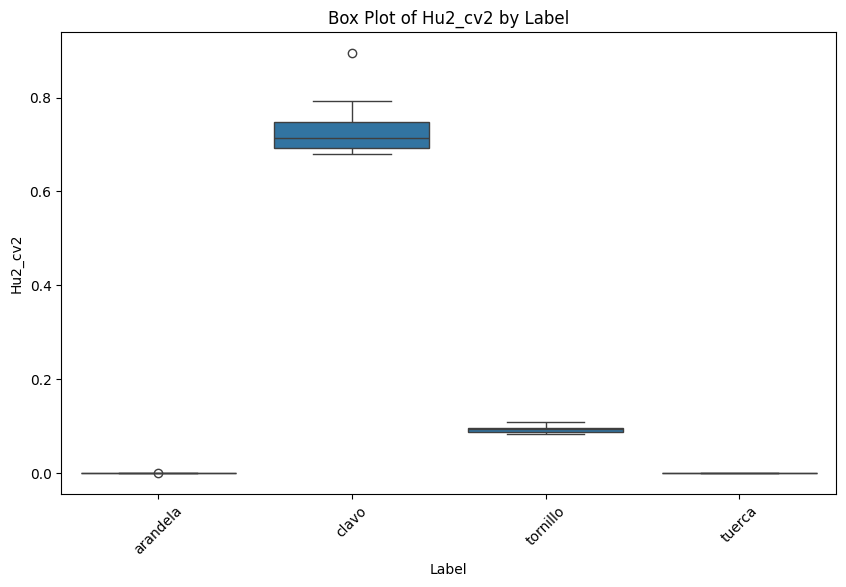

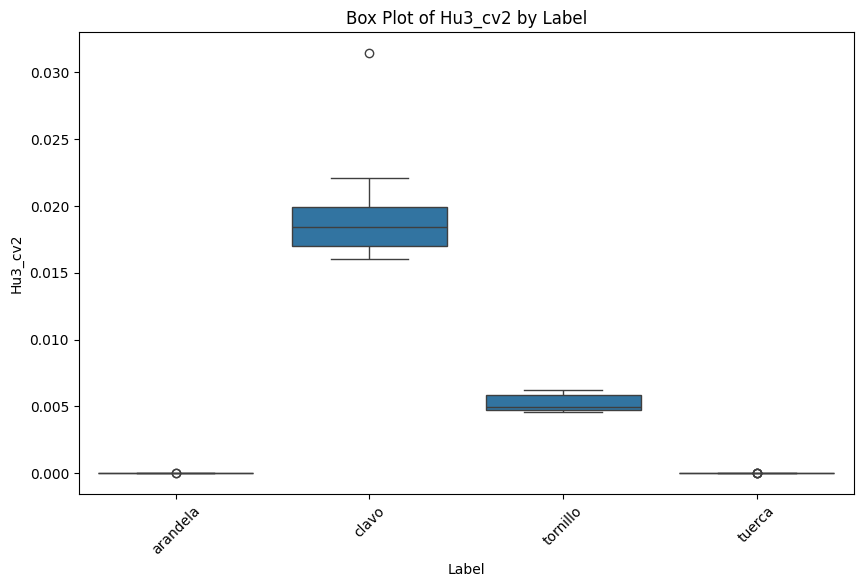

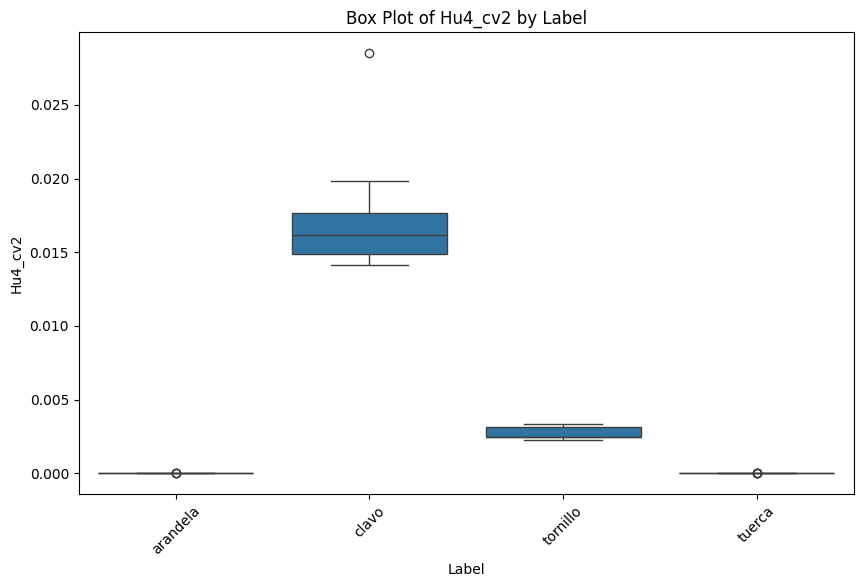

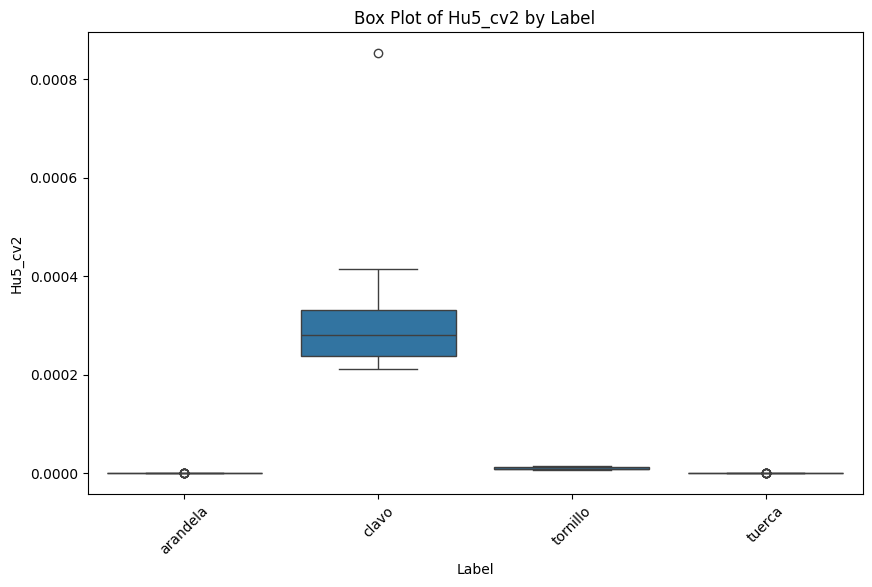

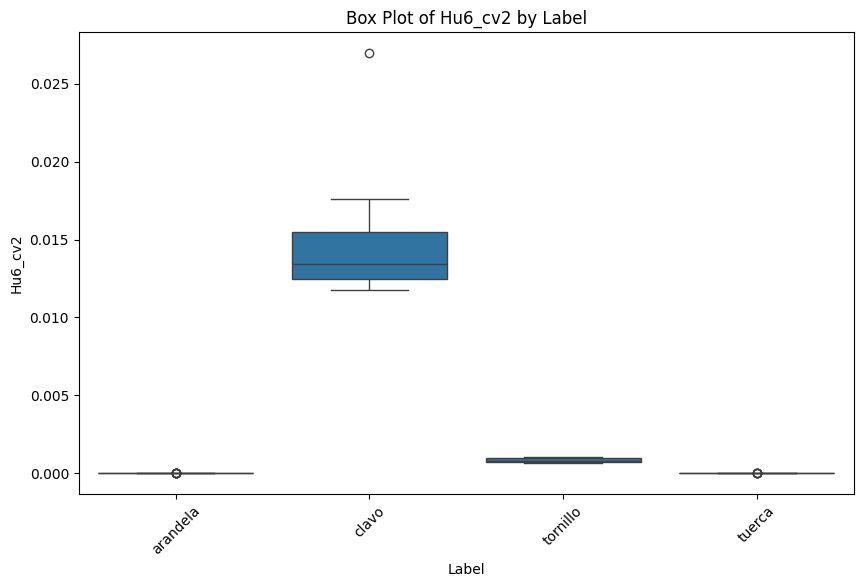

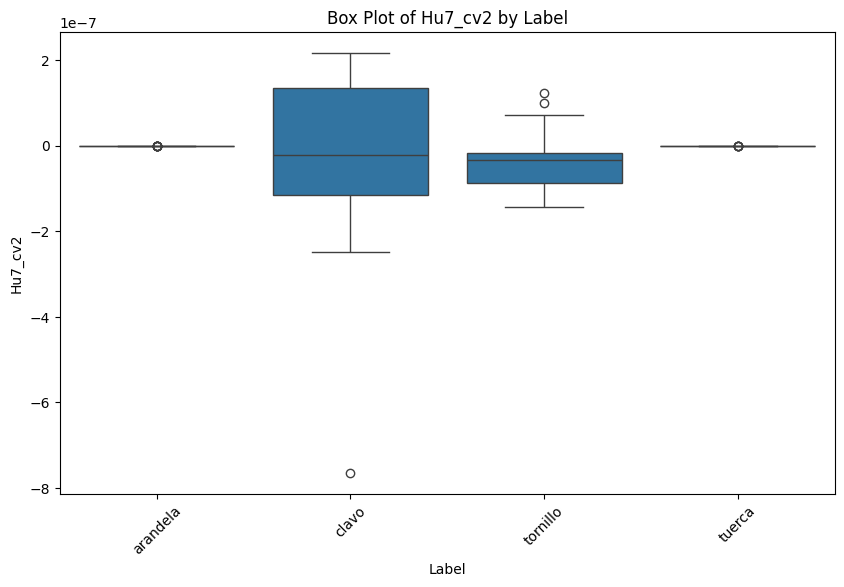

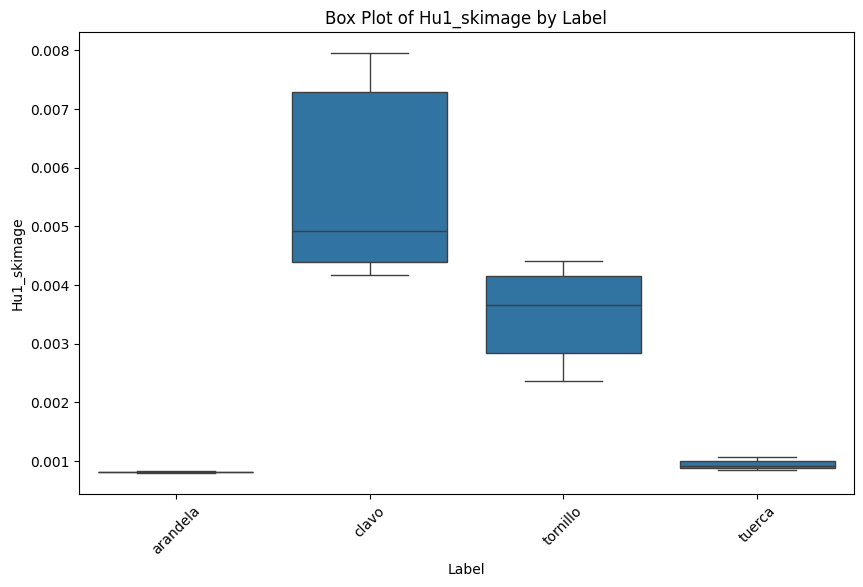

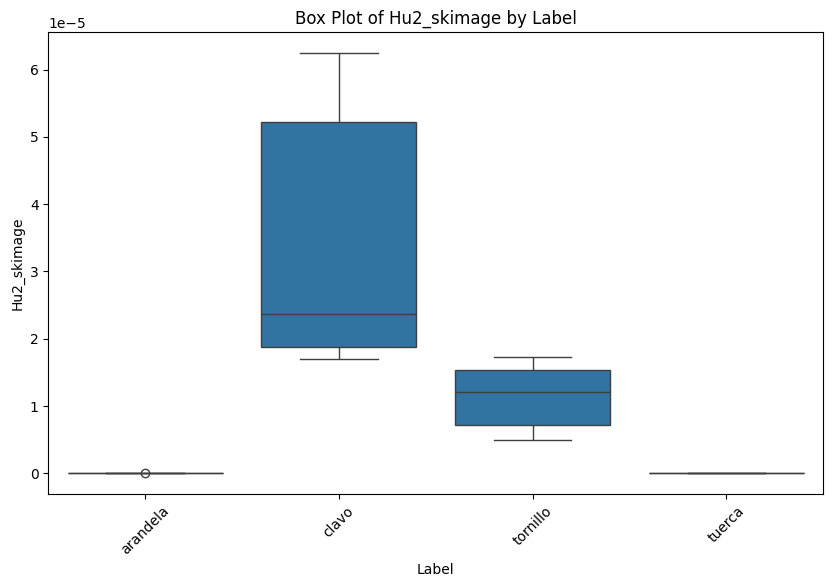

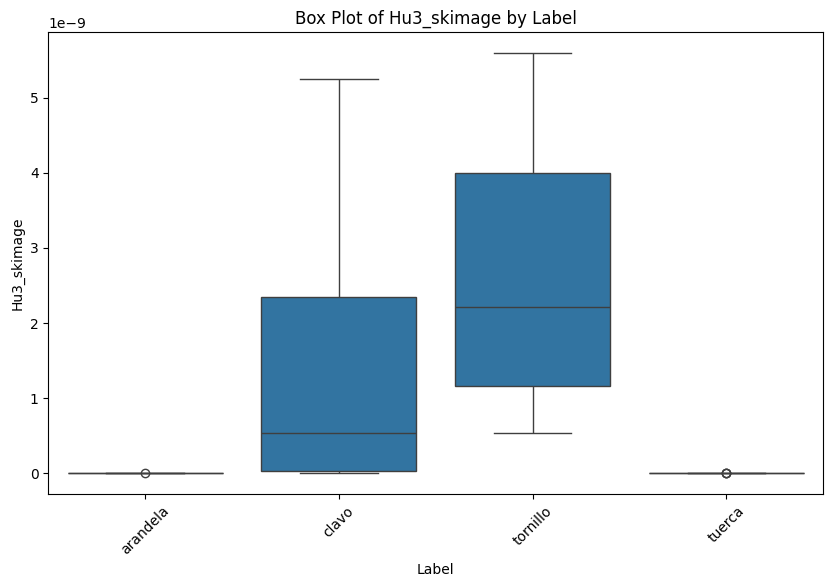

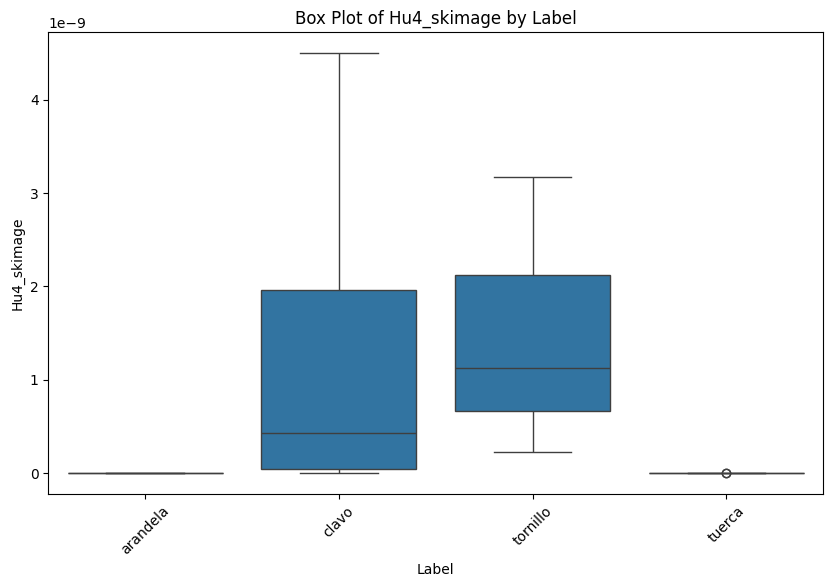

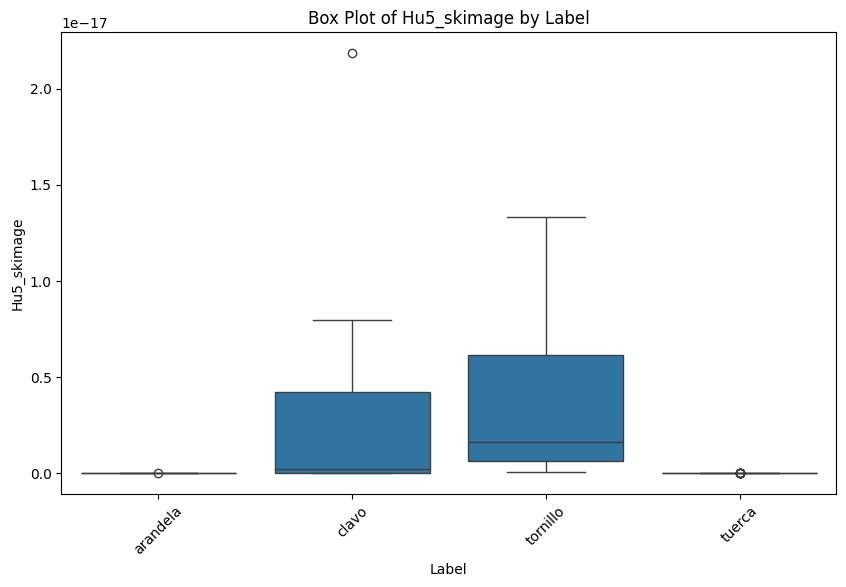

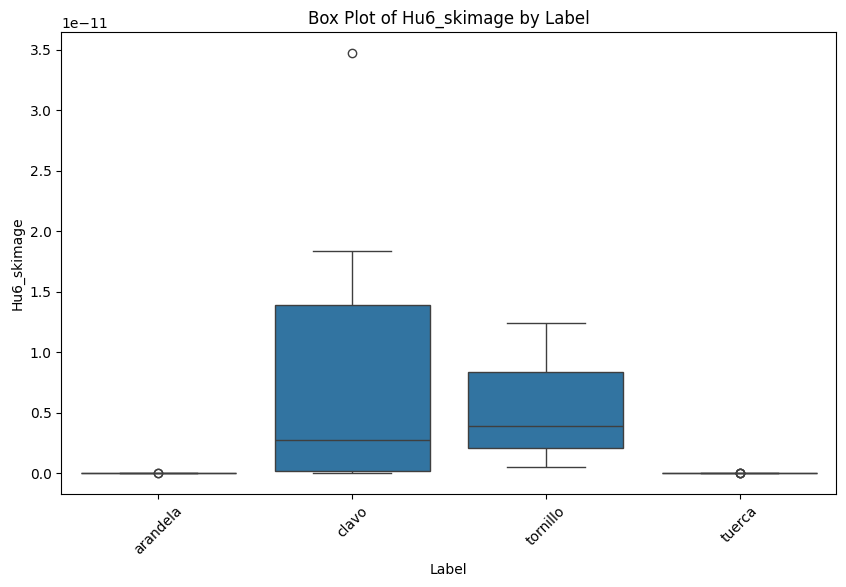

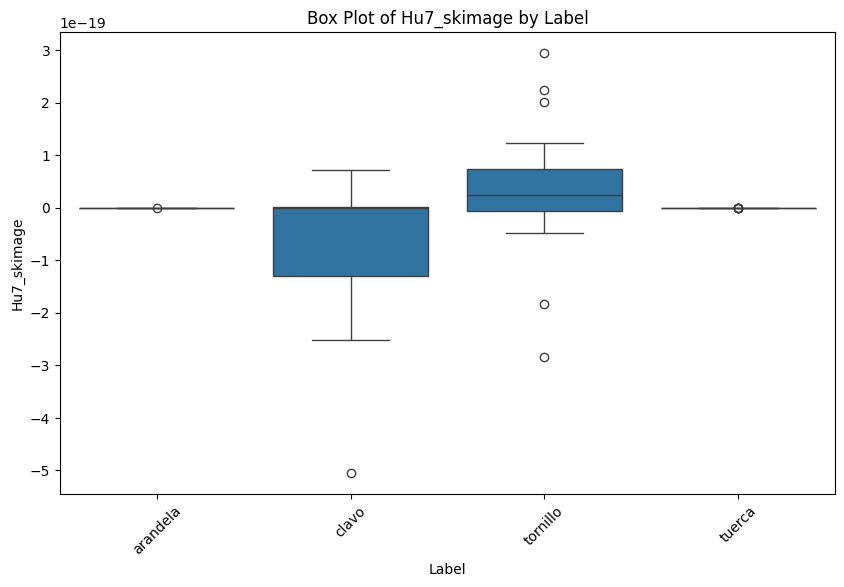

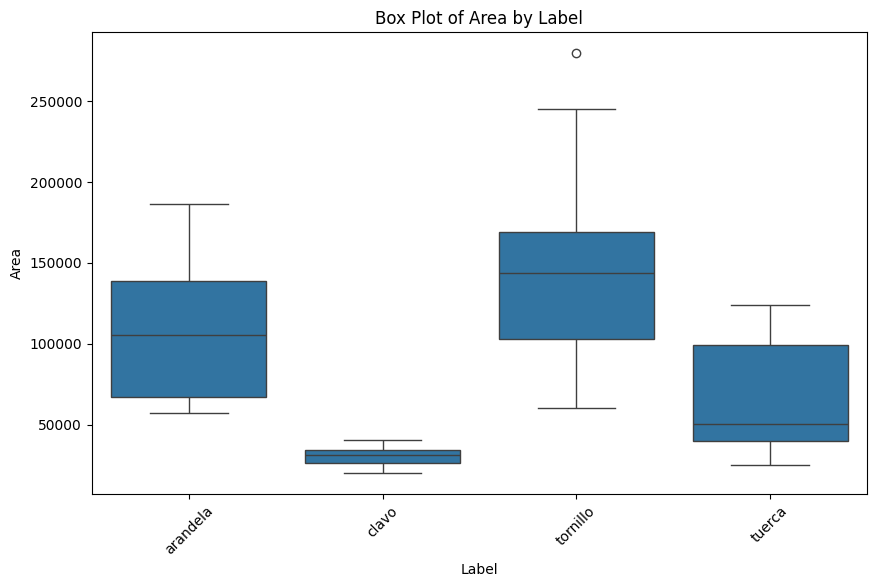

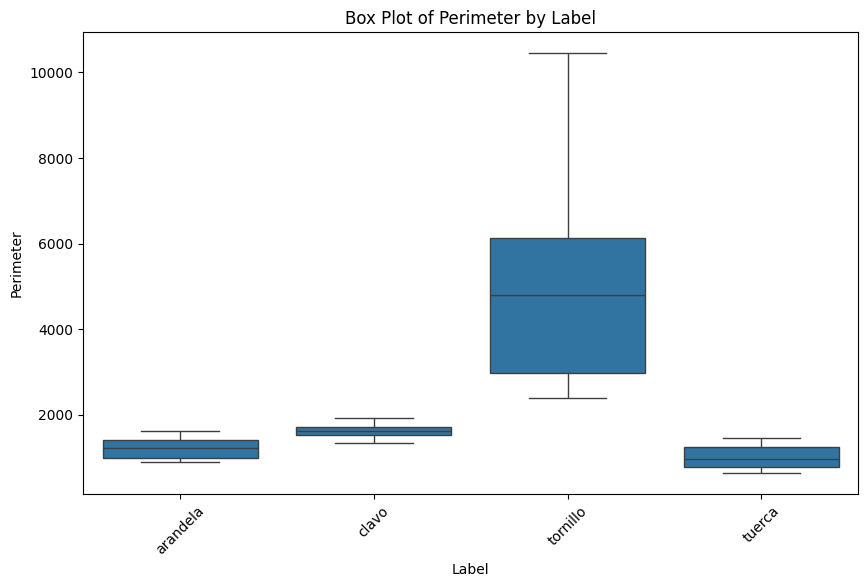

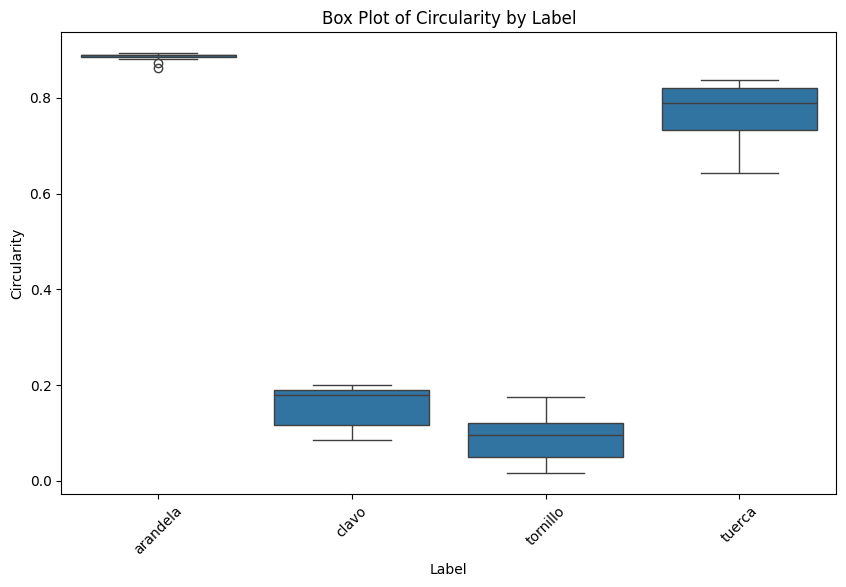

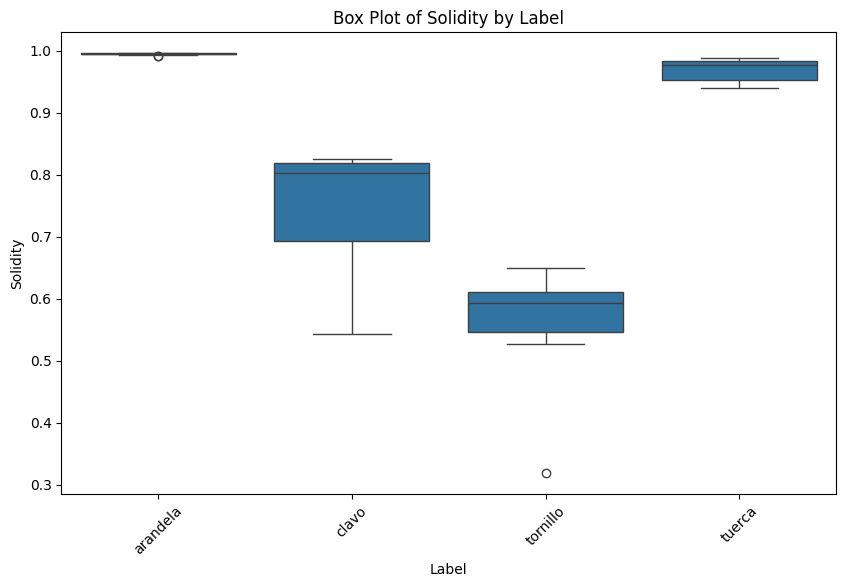

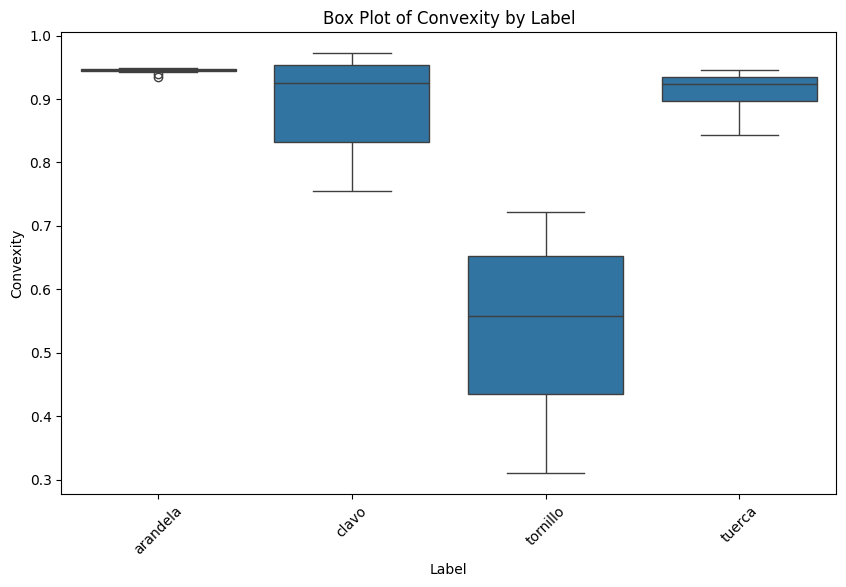

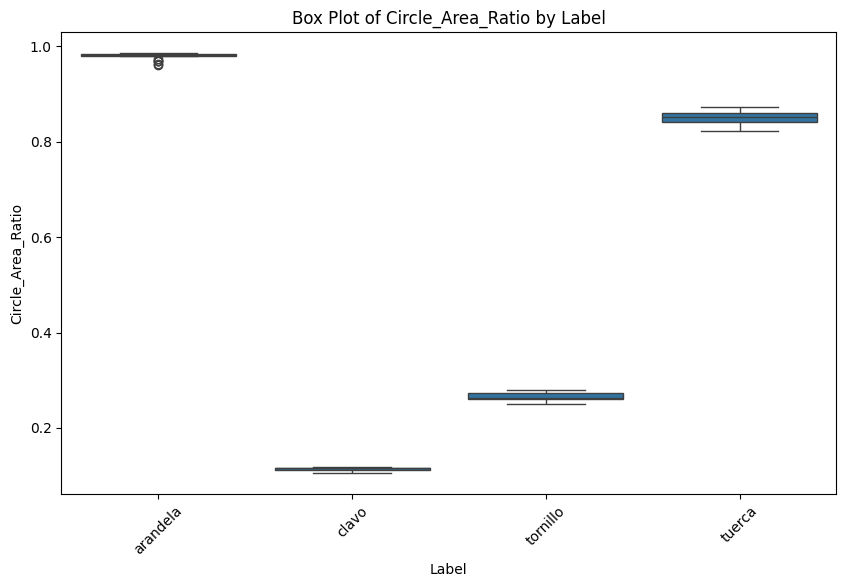

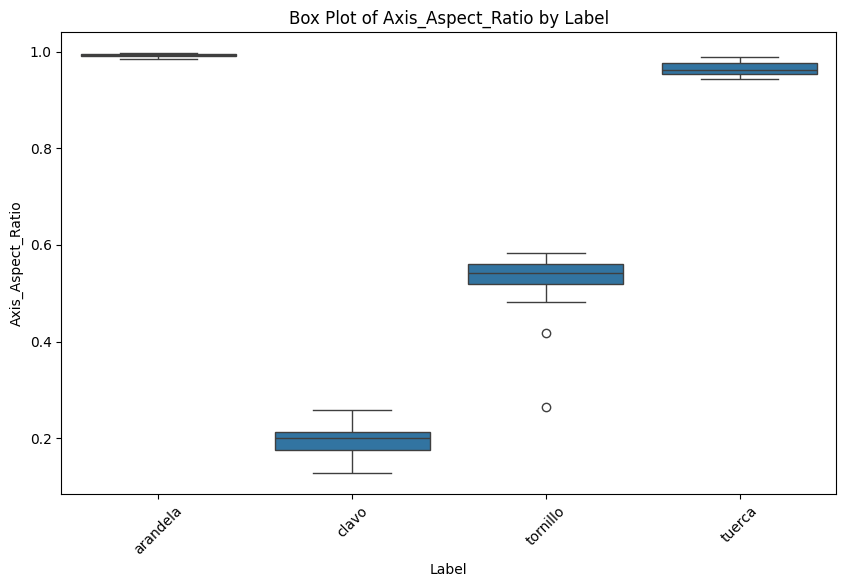

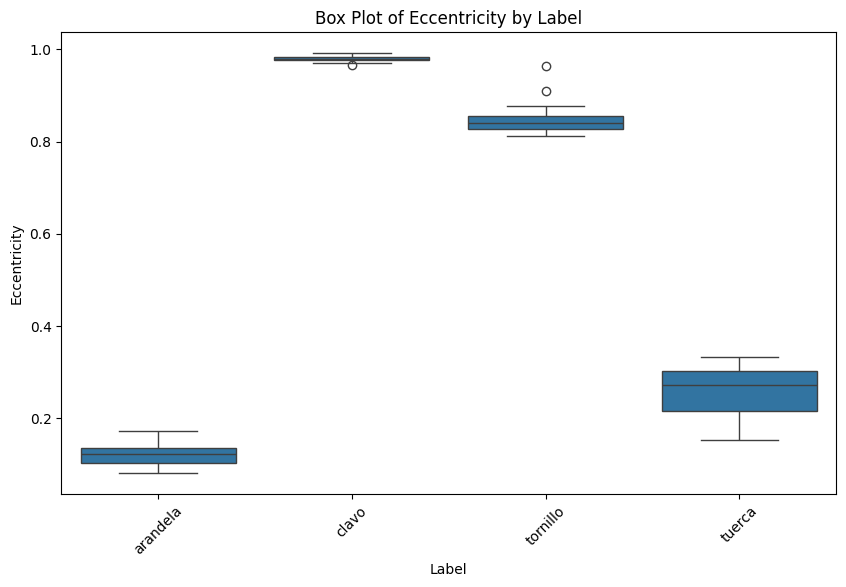

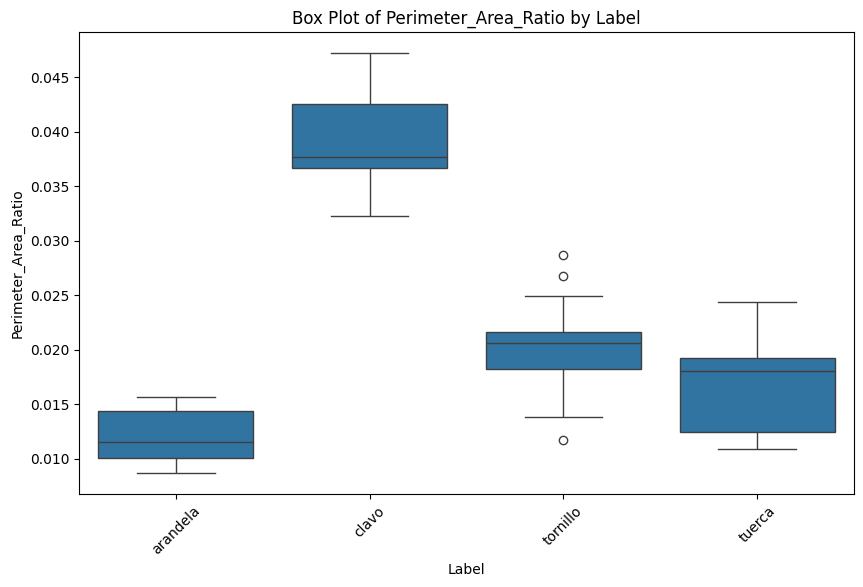

In [107]:
import seaborn as sns

features = df_features.select_dtypes(include=['number']).columns
label_col = "Label"  # Update if your label column has a different name

# Create box plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_features[label_col], y=df_features[feature])
    plt.title(f"Box Plot of {feature} by {label_col}")
    plt.xticks(rotation=45)
    plt.show()

## Scale the features

In [108]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features.drop(columns=['Label']))

mean_array = scaler.mean_
var_array = scaler.var_

print(" mean:", mean_array)
print(" variance:", var_array)

scaled_df = pd.DataFrame(scaled_data, columns=df_features.drop(columns=['Label']).columns)
scaled_df['Label'] = labels

 mean: [ 3.84775619e-01  2.05266479e-01  6.06069527e-03  4.88774242e-03
  8.02606812e-05  3.82024021e-03 -1.51912884e-08  2.75615255e-03
  1.15365080e-05  9.56543584e-10  5.99532635e-10  1.61668235e-18
  3.00711614e-12 -8.31607848e-21  8.57088350e+04  2.21141749e+03
  4.75608075e-01  8.21467071e-01  8.22579423e-01  5.52256299e-01
  6.69292849e-01  5.51438738e-01  2.21659637e-02]
 variance: [8.44821990e-02 9.30134667e-02 6.30604977e-05 5.11569028e-05
 2.15418556e-08 4.01467314e-05 1.20044068e-14 4.86951262e-06
 2.83091516e-10 2.33225184e-18 9.52989144e-19 1.29119335e-35
 3.28152488e-23 8.75636961e-39 3.19930778e+09 3.91801831e+06
 1.28554142e-01 3.23354363e-02 3.26561282e-02 1.36462925e-01
 1.10929737e-01 1.37032663e-01 1.17376805e-04]


In [109]:
scaled_df.columns

Index(['Hu1_cv2', 'Hu2_cv2', 'Hu3_cv2', 'Hu4_cv2', 'Hu5_cv2', 'Hu6_cv2',
       'Hu7_cv2', 'Hu1_skimage', 'Hu2_skimage', 'Hu3_skimage', 'Hu4_skimage',
       'Hu5_skimage', 'Hu6_skimage', 'Hu7_skimage', 'Area', 'Perimeter',
       'Circularity', 'Solidity', 'Convexity', 'Circle_Area_Ratio',
       'Axis_Aspect_Ratio', 'Eccentricity', 'Perimeter_Area_Ratio', 'Label'],
      dtype='object')

In [110]:
scaled_df.columns[[0, 19, 21]]

Index(['Hu1_cv2', 'Circle_Area_Ratio', 'Eccentricity'], dtype='object')

In [111]:
mean_array[[0, 19, 21]]

array([0.38477562, 0.5522563 , 0.55143874])

In [112]:
var_array[[0, 19, 21]]

array([0.0844822 , 0.13646293, 0.13703266])

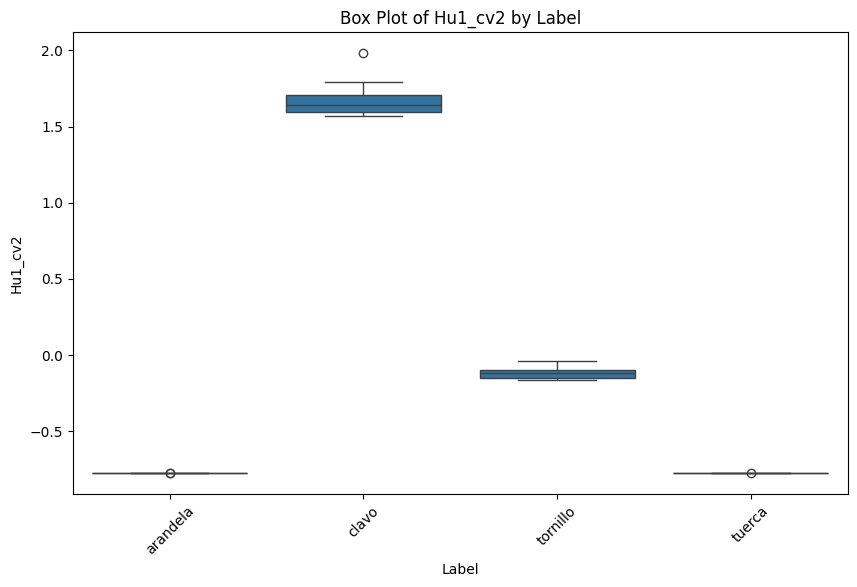

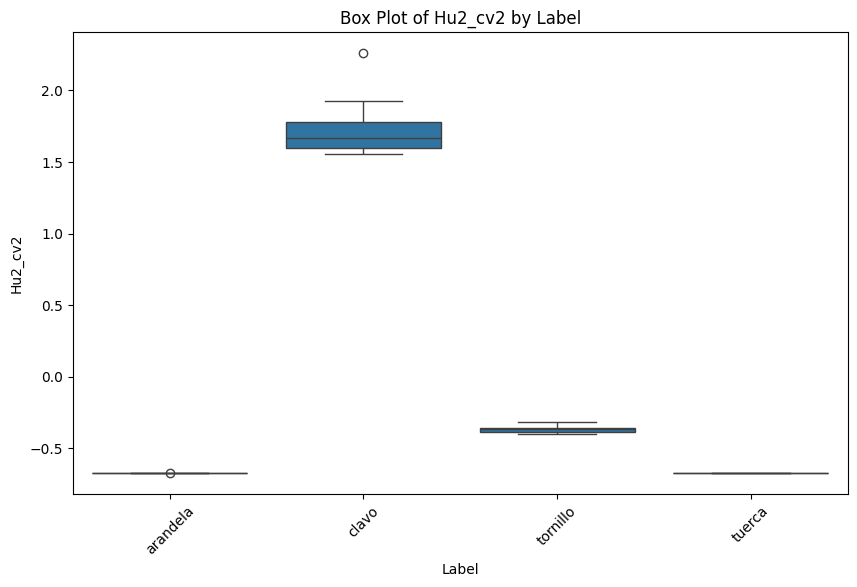

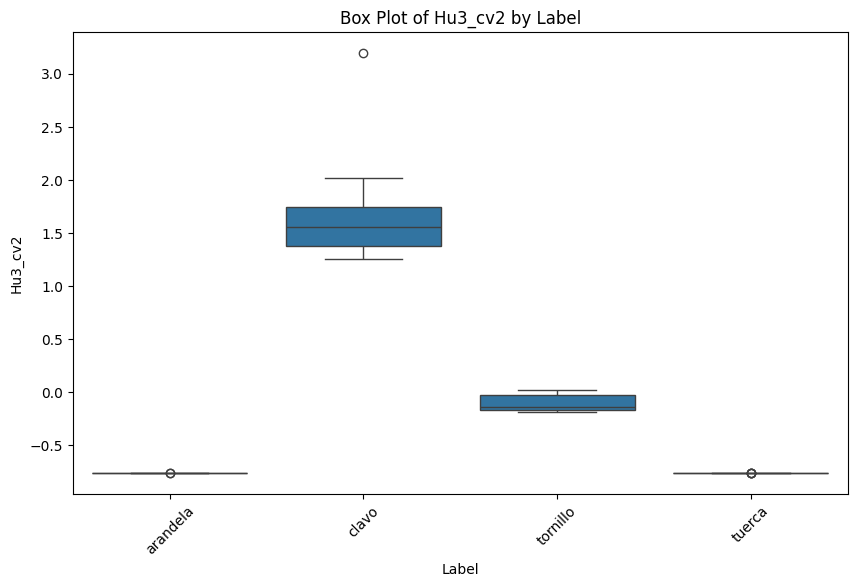

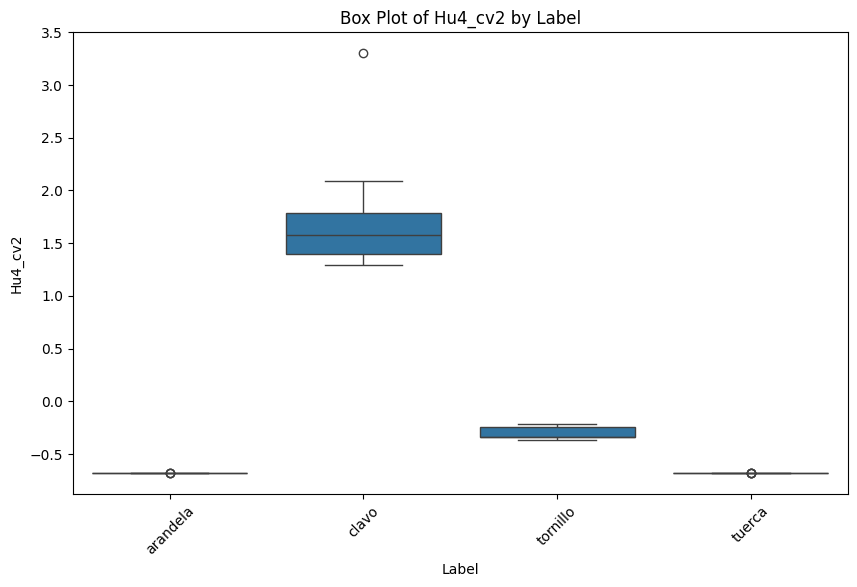

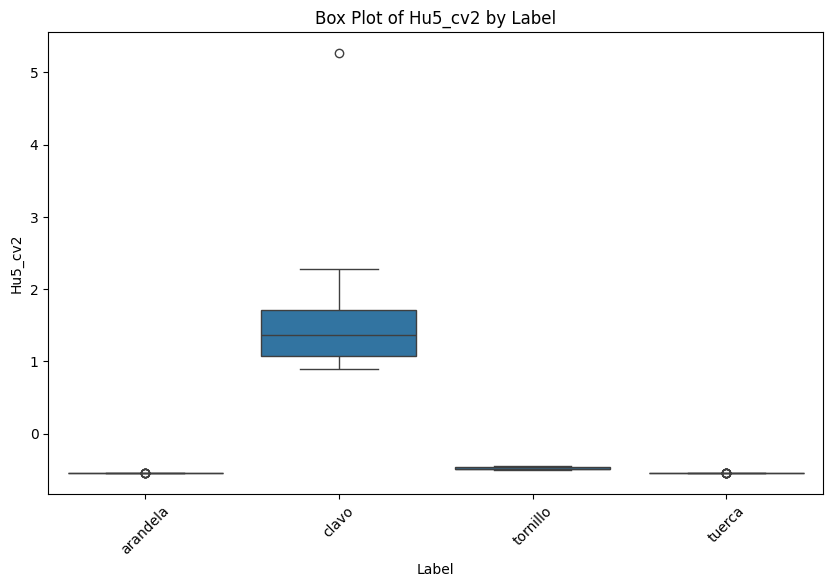

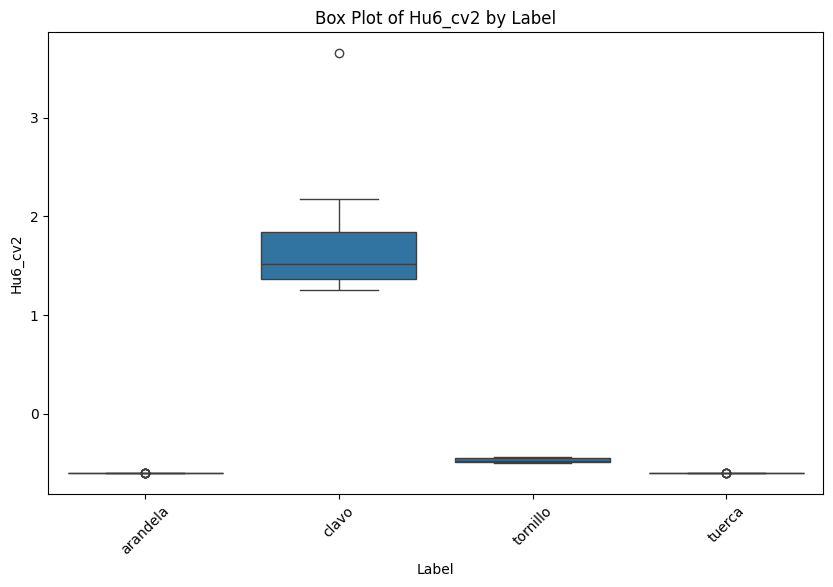

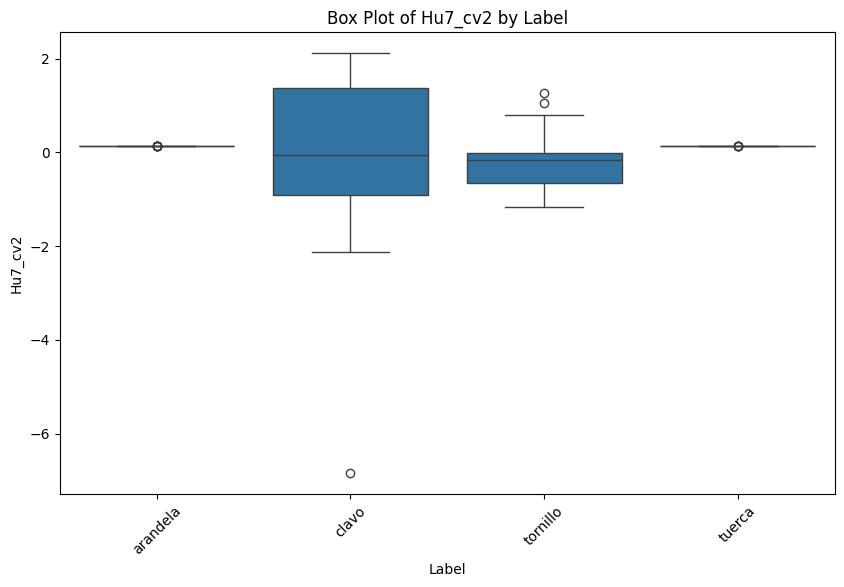

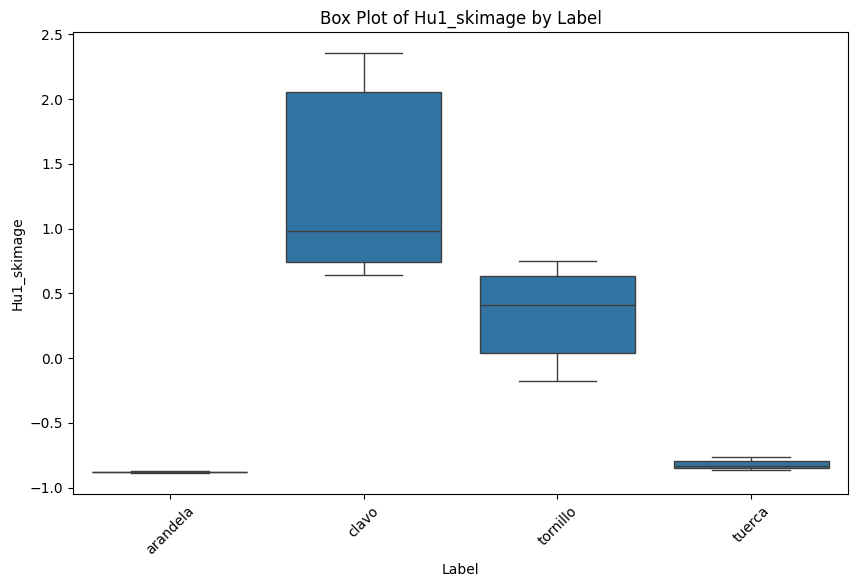

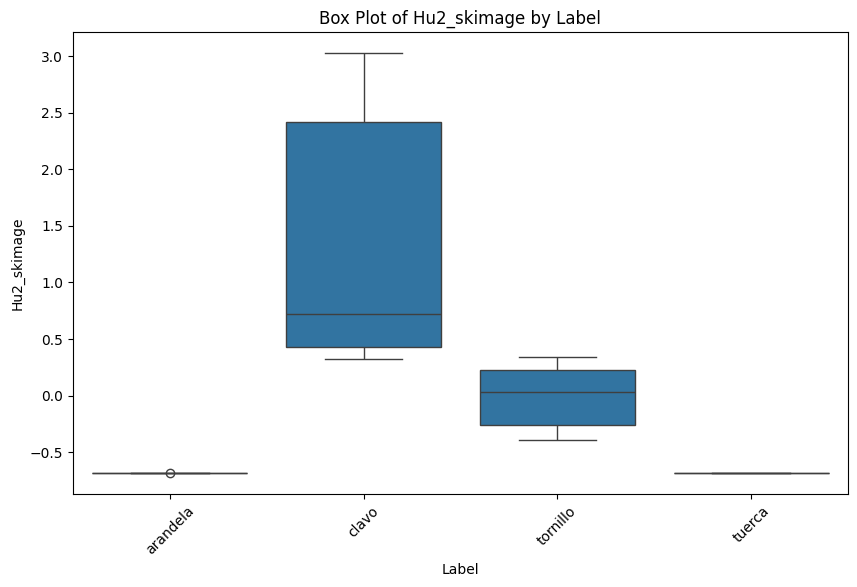

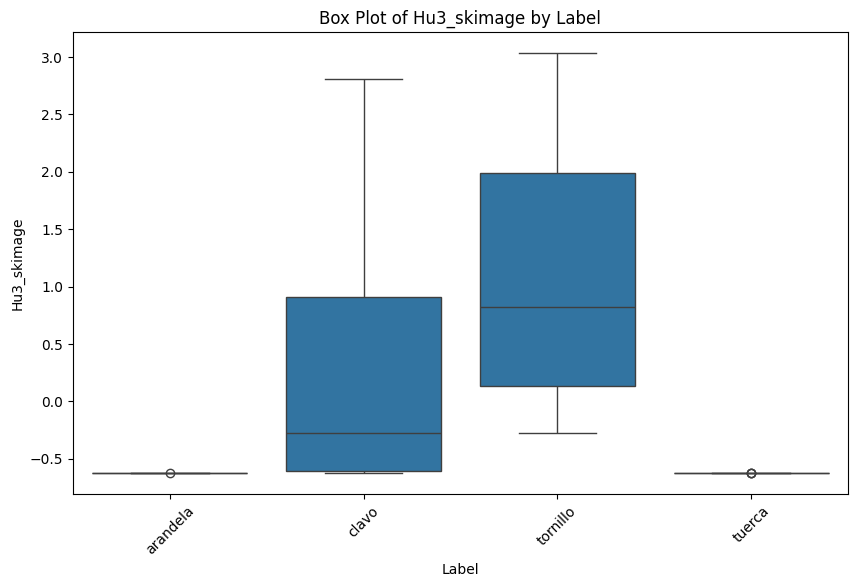

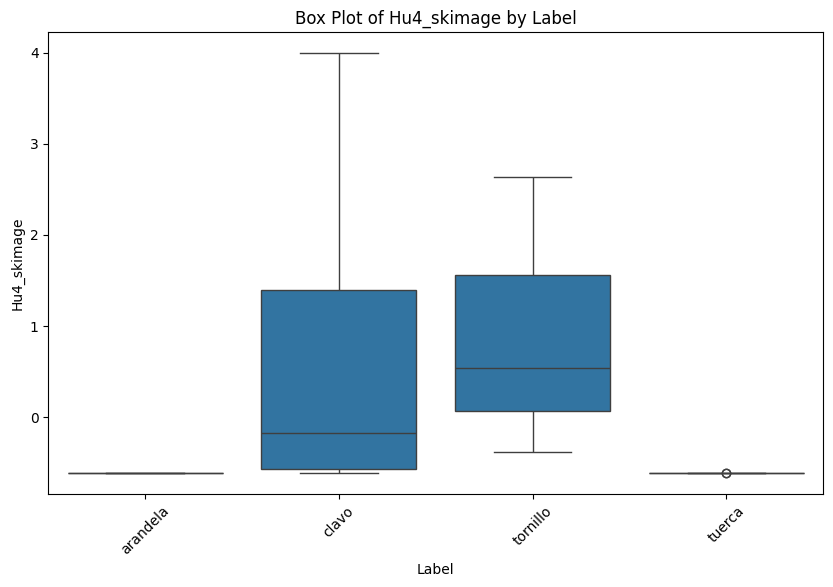

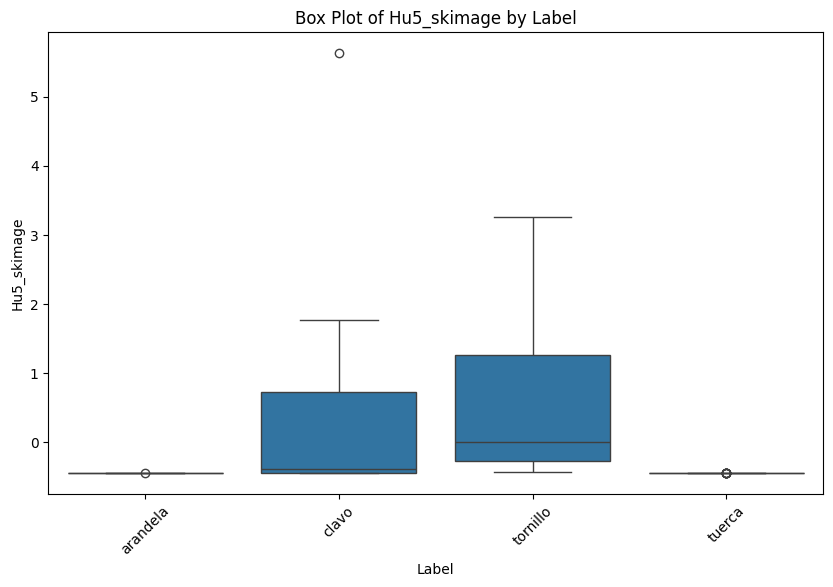

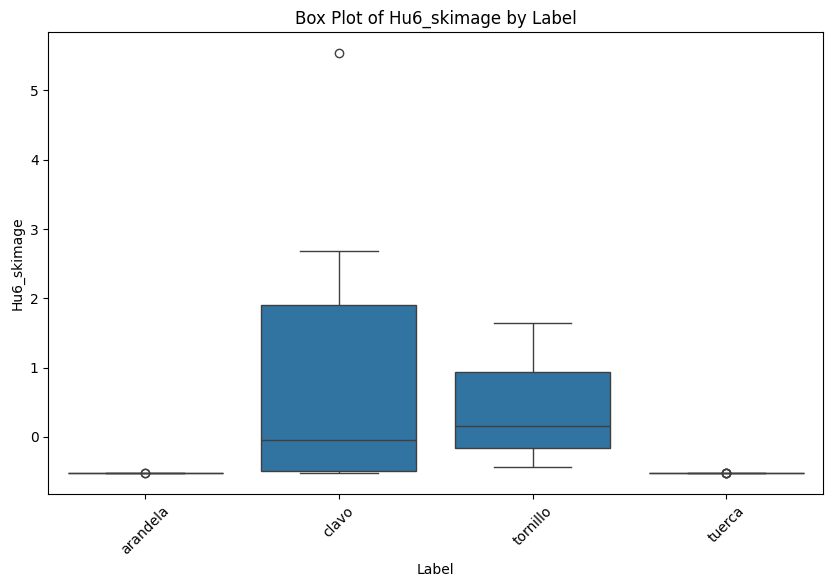

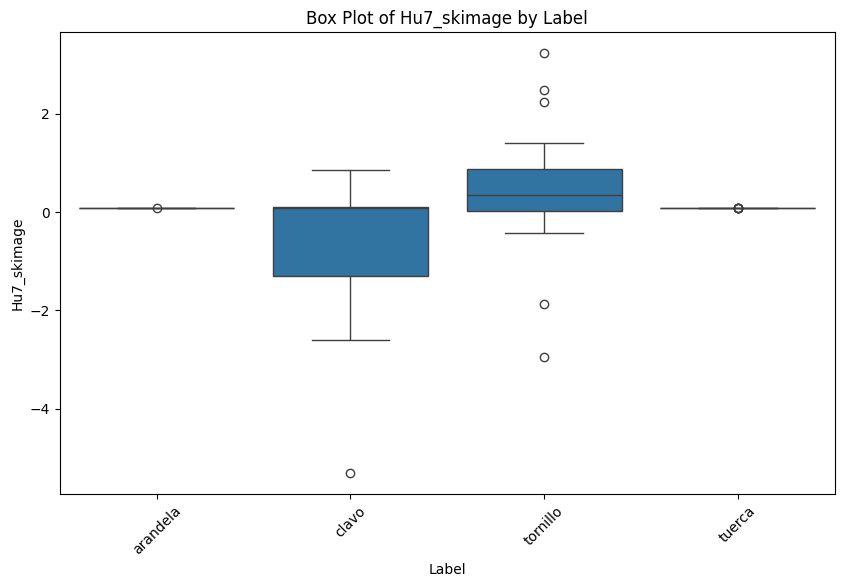

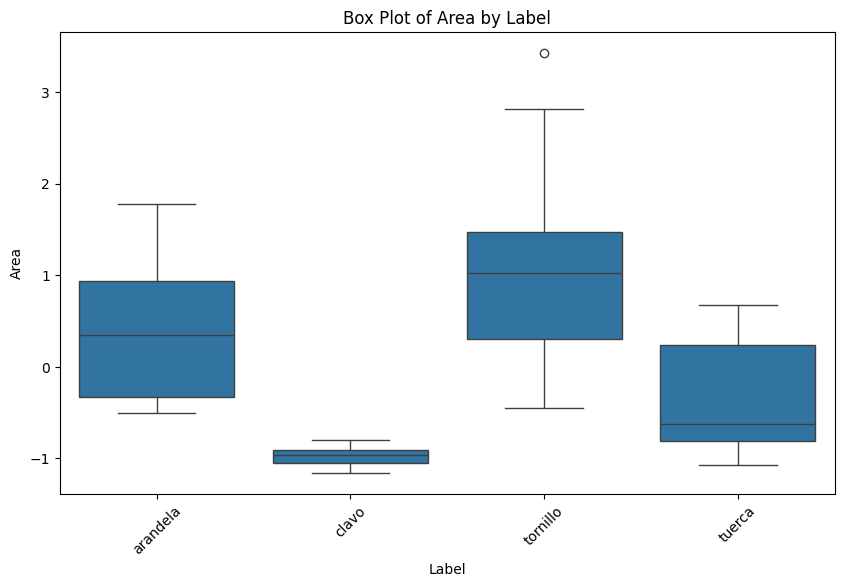

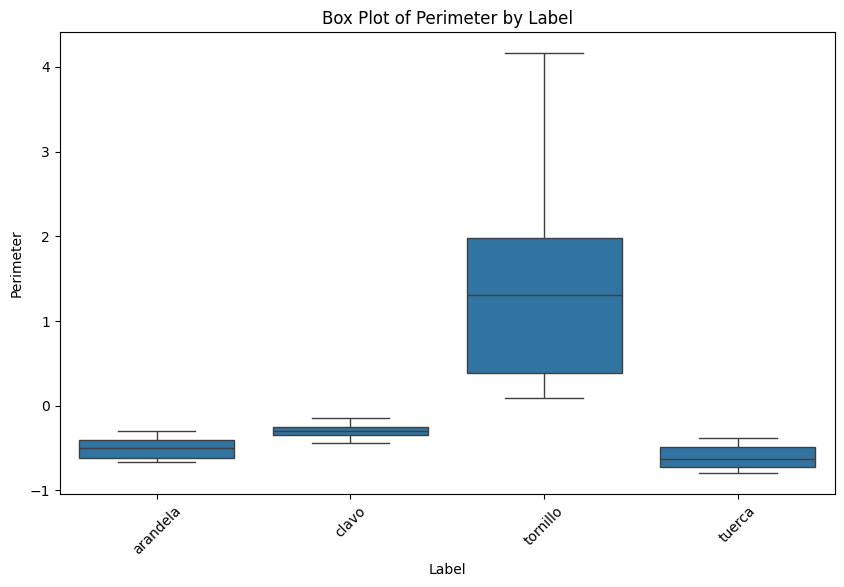

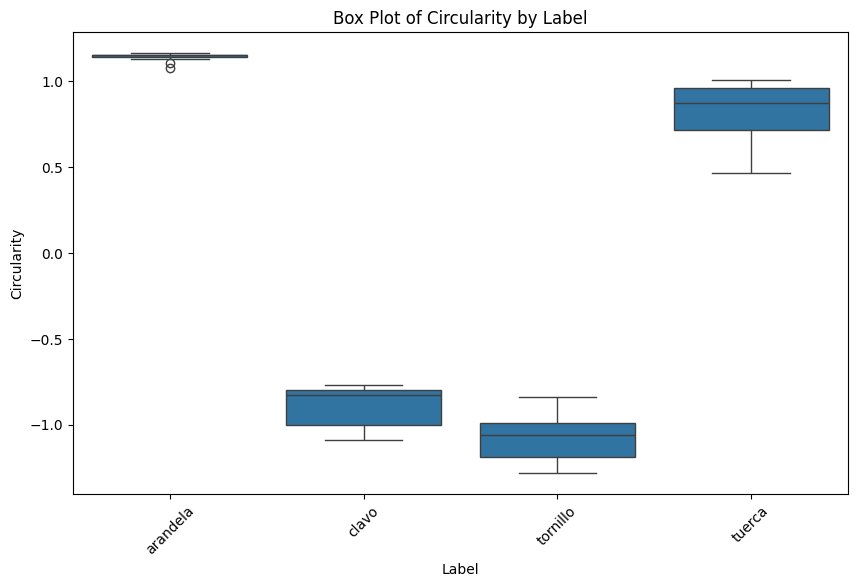

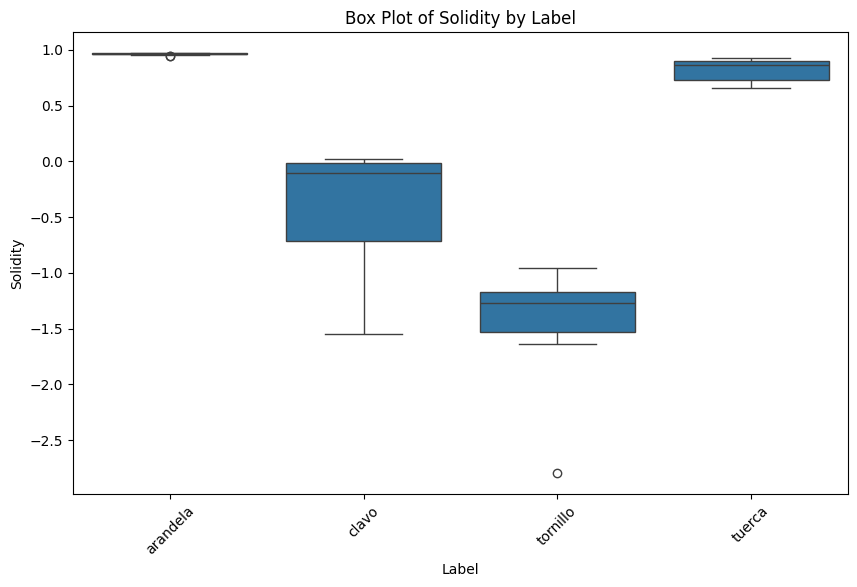

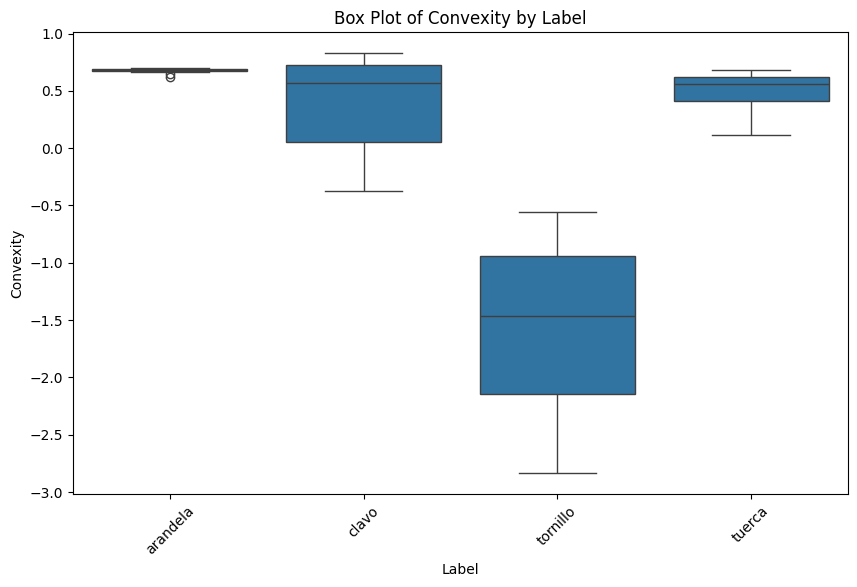

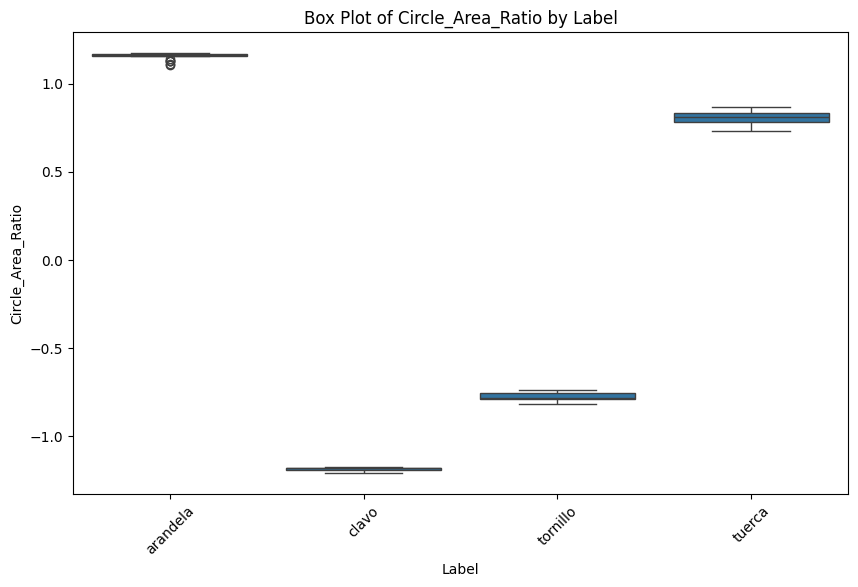

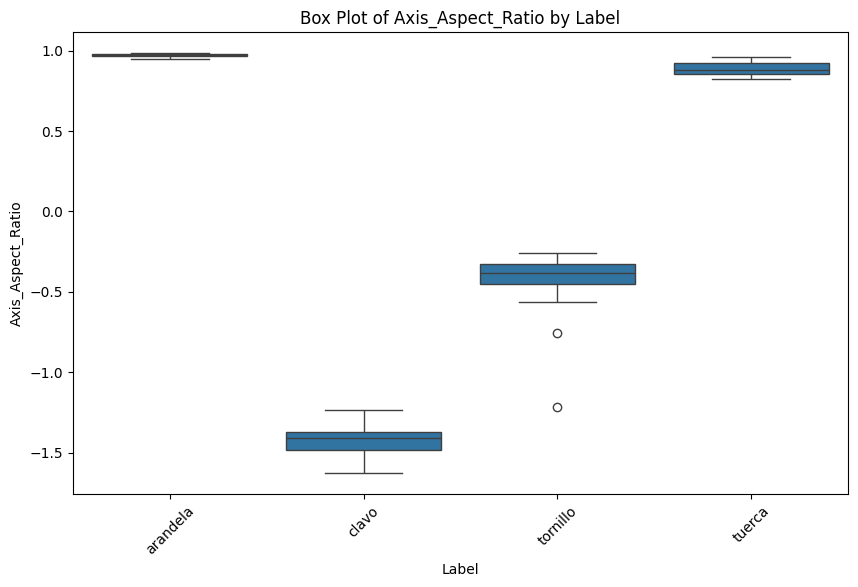

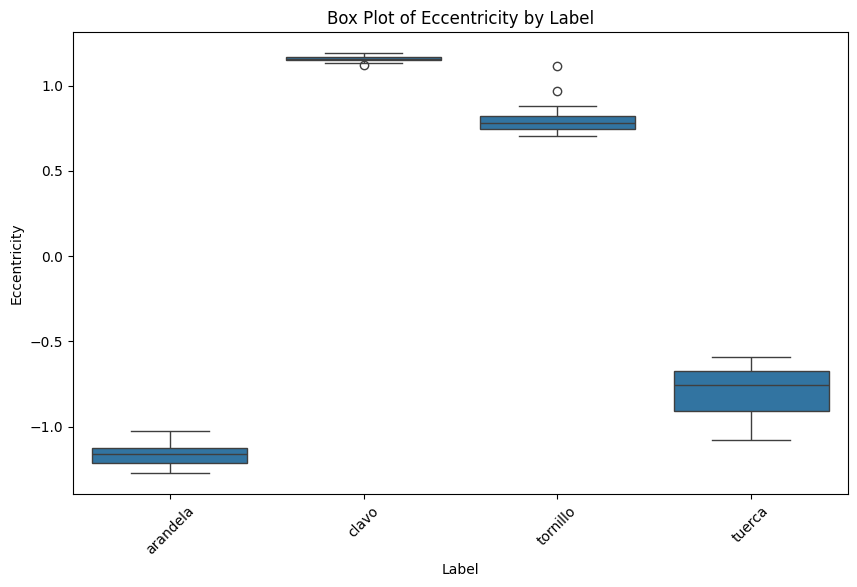

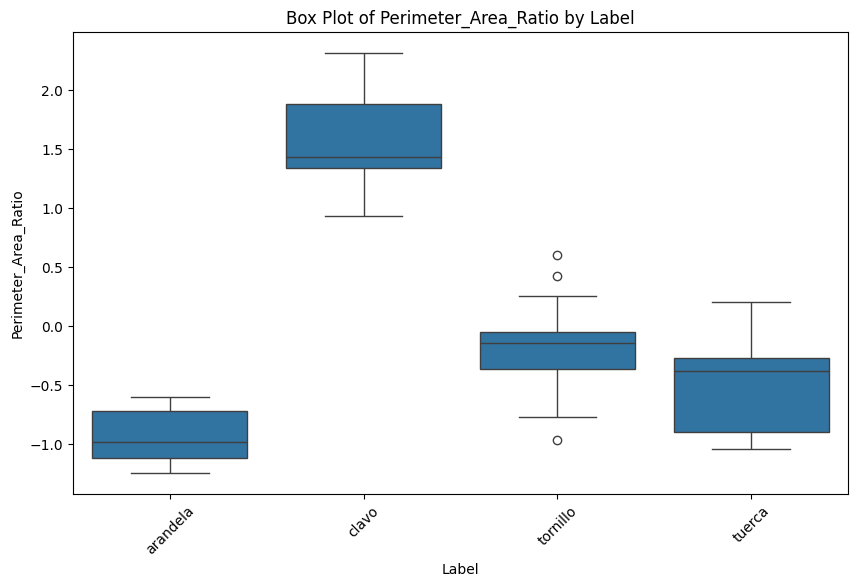

In [113]:
import seaborn as sns

features = scaled_df.select_dtypes(include=['number']).columns
label_col = "Label"  # Update if your label column has a different name

# Create box plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=scaled_df[label_col], y=scaled_df[feature])
    plt.title(f"Box Plot of {feature} by {label_col}")
    plt.xticks(rotation=45)
    plt.show()

## Feature Selection

In [114]:
from sklearn.feature_selection import f_classif, SelectKBest

X = scaled_df.drop(columns=['Label'])  # Features
y = scaled_df['Label']                # Label

f_values, p_values = f_classif(X, y)

# Display scores
for feature, f_val, p_val in zip(X.columns, f_values, p_values):
    print(f"Feature: {feature}, F-value: {f_val:.2f}, P-value: {p_val:.4f}")

Feature: Hu1_cv2, F-value: 13264.37, P-value: 0.0000
Feature: Hu2_cv2, F-value: 5143.85, P-value: 0.0000
Feature: Hu3_cv2, F-value: 831.02, P-value: 0.0000
Feature: Hu4_cv2, F-value: 774.16, P-value: 0.0000
Feature: Hu5_cv2, F-value: 150.08, P-value: 0.0000
Feature: Hu6_cv2, F-value: 532.59, P-value: 0.0000
Feature: Hu7_cv2, F-value: 0.85, P-value: 0.4697
Feature: Hu1_skimage, F-value: 213.65, P-value: 0.0000
Feature: Hu2_skimage, F-value: 86.68, P-value: 0.0000
Feature: Hu3_skimage, F-value: 31.32, P-value: 0.0000
Feature: Hu4_skimage, F-value: 20.97, P-value: 0.0000
Feature: Hu5_skimage, F-value: 8.88, P-value: 0.0000
Feature: Hu6_skimage, F-value: 13.13, P-value: 0.0000
Feature: Hu7_skimage, F-value: 5.36, P-value: 0.0019
Feature: Area, F-value: 38.25, P-value: 0.0000
Feature: Perimeter, F-value: 70.78, P-value: 0.0000
Feature: Circularity, F-value: 2271.80, P-value: 0.0000
Feature: Solidity, F-value: 306.29, P-value: 0.0000
Feature: Convexity, F-value: 172.44, P-value: 0.0000
Featu

In [115]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
for feature, score in zip(X.columns, mi_scores):
    print(f"Feature: {feature}, MI Score: {score:.4f}")

Feature: Hu1_cv2, MI Score: 1.4014
Feature: Hu2_cv2, MI Score: 1.2394
Feature: Hu3_cv2, MI Score: 1.2985
Feature: Hu4_cv2, MI Score: 1.3708
Feature: Hu5_cv2, MI Score: 0.9951
Feature: Hu6_cv2, MI Score: 1.3297
Feature: Hu7_cv2, MI Score: 0.7730
Feature: Hu1_skimage, MI Score: 1.2776
Feature: Hu2_skimage, MI Score: 1.2704
Feature: Hu3_skimage, MI Score: 1.0197
Feature: Hu4_skimage, MI Score: 0.8805
Feature: Hu5_skimage, MI Score: 0.8922
Feature: Hu6_skimage, MI Score: 0.9475
Feature: Hu7_skimage, MI Score: 0.8210
Feature: Area, MI Score: 0.7001
Feature: Perimeter, MI Score: 0.9775
Feature: Circularity, MI Score: 1.1708
Feature: Solidity, MI Score: 1.2669
Feature: Convexity, MI Score: 0.9932
Feature: Circle_Area_Ratio, MI Score: 1.4014
Feature: Axis_Aspect_Ratio, MI Score: 1.3155
Feature: Eccentricity, MI Score: 1.3197
Feature: Perimeter_Area_Ratio, MI Score: 0.9391


### Drop Hu_Moments_7


In [116]:
scaled_df.columns

Index(['Hu1_cv2', 'Hu2_cv2', 'Hu3_cv2', 'Hu4_cv2', 'Hu5_cv2', 'Hu6_cv2',
       'Hu7_cv2', 'Hu1_skimage', 'Hu2_skimage', 'Hu3_skimage', 'Hu4_skimage',
       'Hu5_skimage', 'Hu6_skimage', 'Hu7_skimage', 'Area', 'Perimeter',
       'Circularity', 'Solidity', 'Convexity', 'Circle_Area_Ratio',
       'Axis_Aspect_Ratio', 'Eccentricity', 'Perimeter_Area_Ratio', 'Label'],
      dtype='object')

In [118]:
selected_features_df = scaled_df[['Label', 'Hu1_cv2', 'Circle_Area_Ratio', 'Eccentricity']]
selected_features_df

Label   Hu1_cv2  Circle_Area_Ratio  Eccentricity
0   arandela -0.776202           1.163839     -1.169156
1   arandela -0.776110           1.105030     -1.071377
2   arandela -0.776172           1.130675     -1.092227
3   arandela -0.776179           1.164769     -1.103738
4   arandela -0.776206           1.158721     -1.210366
..       ...       ...                ...           ...
95    tuerca -0.773047           0.802404     -0.808830
96    tuerca -0.773120           0.852278     -0.734217
97    tuerca -0.772986           0.833026     -0.615495
98    tuerca -0.773498           0.842504     -0.672768
99    tuerca -0.773462           0.797326     -0.591066

[100 rows x 4 columns]

### Convert label to categorical features

In [119]:
selected_features_df["label_categorical"] = selected_features_df["Label"].astype("category").cat.codes
category_mapping = dict(enumerate(selected_features_df["Label"].astype("category").cat.categories))

print("DataFrame with Categorical Codes:")
print(selected_features_df.head())

print("\nCategory Mapping:")
print(category_mapping)

DataFrame with Categorical Codes:
      Label   Hu1_cv2  Circle_Area_Ratio  Eccentricity  label_categorical
0  arandela -0.776202           1.163839     -1.169156                  0
1  arandela -0.776110           1.105030     -1.071377                  0
2  arandela -0.776172           1.130675     -1.092227                  0
3  arandela -0.776179           1.164769     -1.103738                  0
4  arandela -0.776206           1.158721     -1.210366                  0

Category Mapping:
{0: 'arandela', 1: 'clavo', 2: 'tornillo', 3: 'tuerca'}


C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\2590808285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df["label_categorical"] = selected_features_df["Label"].astype("category").cat.codes


In [120]:
selected_features_df.drop(columns=['Label'], inplace=True)

C:\Users\coraz\AppData\Local\Temp\ipykernel_20484\3607201410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df.drop(columns=['Label'], inplace=True)


# Implement K-Nearest Neighbours

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.utils import shuffle

selected_features_df = shuffle(selected_features_df, random_state=42).reset_index(drop=True)
X = np.array(selected_features_df.drop(columns=['label_categorical']))
y = np.array(selected_features_df['label_categorical'])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=7)  # Using k=7

scores = cross_val_score(knn_model, X, y, cv=skf, scoring="accuracy")

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


## My version

In [122]:
import warnings
from collections import Counter

def knn(X, y, predict, k, category_mapping):
    if(X.shape[1] != predict.shape[0]):
        raise(f"Invalid input shape. It should be {X.shape} but it is {predict.shape}.")
    if(k <= len(np.unique(y))):
        warnings.warn('K is set to a value less than total voting groups.')

    X = np.array(X)
    y = np.array(y)
    predict = np.array(predict)
    # KNN Algorithm
    distances = []
    for index, instance in enumerate(X):
        euclidean_distance = np.linalg.norm(instance-predict)
        distances.append([euclidean_distance, y[index]])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0]

    vote_result_categorical = category_mapping[vote_result[0]] # Gives the name of the class ('arandela' for example)
    #print(vote_result)
    confidence = vote_result[1] / k
    #print(f"Confidence: {confidence* 100}%")
    
    return vote_result_categorical, confidence

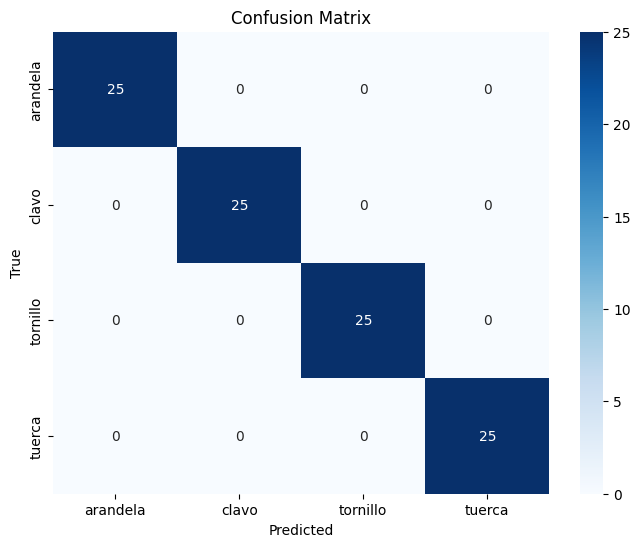

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define variables to store predictions and true labels for confusion matrix
y_true = []  # True labels
y_pred = []  # Predicted labels

# Loop over all test samples and store results
for i in range(len(X)):
    prediction, _ = knn(X, y, X[i], k=5, category_mapping=category_mapping)
    y_true.append(category_mapping[y[i]])  # Store the true class name (category_mapping maps label to class)
    y_pred.append(prediction)  # Store the predicted class name

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(category_mapping.values()))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=category_mapping.values(), yticklabels=category_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Implement K-Means

In [124]:
def initialize_centroids(X, k):
    """Randomly chose k centroids from the dataset."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Assign each point to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Compute new centroids as the mean of points in each cluster."""
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [125]:
def kmeans_plusplus_initialization(X, k):
    """
    K-Means++ initialization for selecting initial centroids.

    Parameters:
    - X: numpy array of shape (n_samples, n_features), the input data.
    - k: int, the number of centroids to initialize.

    Returns:
    - centroids: numpy array of shape (k, n_features), the initialized centroids.
    """
    n_samples, n_features = X.shape

    # Step 1: Randomly select the first centroid
    centroids = [X[np.random.choice(n_samples)]]

    for _ in range(1, k):
        # Step 2: Compute squared distances to the nearest centroid
        distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids]) for x in X])

        # Step 3: Select the next centroid with probability proportional to distances
        probabilities = distances / distances.sum()
        next_centroid_idx = np.random.choice(n_samples, p=probabilities)
        centroids.append(X[next_centroid_idx])

    return np.array(centroids)

In [126]:
def kmeans(X, k, max_iters=100, tol=1e-4, n_init=10):
    """
    Run K-Means multiple times and return the best result.

    Parameters:
    - X: numpy array of shape (n_samples, n_features), the input data.
    - k: int, the number of clusters.
    - max_iters: int, maximum number of iterations per run.
    - tol: float, tolerance for convergence.
    - n_init: int, number of times to run K-Means with different initializations.

    Returns:
    - best_centroids: numpy array of shape (k, n_features), the best centroids.
    - best_labels: numpy array of shape (n_samples,), the best cluster assignments.
    - best_inertia: float, the lowest inertia achieved.
    """
    best_inertia = np.inf
    best_centroids = None
    best_labels = None

    for _ in range(n_init):
        # Run K-Means
        centroids = kmeans_plusplus_initialization(X, k)
        for _ in range(max_iters):
            labels = assign_clusters(X, centroids)
            new_centroids = update_centroids(X, labels, k)

            # Check for convergence
            if np.linalg.norm(new_centroids - centroids) < tol:
                break

            centroids = new_centroids

        # Compute inertia (sum of squared distances)
        inertia = np.sum([np.linalg.norm(X[labels == j] - centroids[j])**2 for j in range(k)])

        # Update best result
        if inertia < best_inertia:
            best_inertia = inertia
            best_centroids = centroids
            best_labels = labels

    return best_centroids, best_labels, best_inertia

In [127]:
best_centroids, best_labels, best_inertia = kmeans(X, k=4, n_init=10)
print(best_labels)
print(y)

[0 3 3 1 1 1 2 0 2 2 2 1 3 1 0 2 0 0 2 1 3 0 1 1 3 2 1 0 2 3 2 1 0 1 0 2 3
 3 1 2 1 1 2 0 1 2 0 1 3 2 2 2 2 1 2 0 2 3 1 0 3 0 3 1 3 3 1 3 3 0 0 1 3 1
 0 3 0 1 0 3 3 0 1 1 2 3 2 2 2 0 0 3 0 0 2 3 3 2 0 3]
[3 2 2 1 1 1 0 3 0 0 0 1 2 1 3 0 3 3 0 1 2 3 1 1 2 0 1 3 0 2 0 1 3 1 3 0 2
 2 1 0 1 1 0 3 1 0 3 1 2 0 0 0 0 1 0 3 0 2 1 3 2 3 2 1 2 2 1 2 2 3 3 1 2 1
 3 2 3 1 3 2 2 3 1 1 0 2 0 0 0 3 3 2 3 3 0 2 2 0 3 2]


In [128]:
from scipy.stats import mode

def cluster_to_label_mapping(y_true, y_pred):
    """Finds the most frequent true label for each cluster."""
    unique_clusters = np.unique(y_pred)
    cluster_mapping = {}

    for cluster in unique_clusters:
        mask = y_pred == cluster
        most_common_label = mode(y_true[mask]).mode
        cluster_mapping[int(cluster)] = int(most_common_label)
    
    return cluster_mapping

# Compute cluster-to-label mapping
mapping = cluster_to_label_mapping(np.array(y), np.array(best_labels))
print("Cluster to Label Mapping:", mapping)

Cluster to Label Mapping: {0: 3, 1: 1, 2: 0, 3: 2}


In [129]:
def clustering_accuracy(y_true, y_pred, cluster_mapping):
    """Computes the clustering accuracy based on cluster-label mapping."""
    correct_count = np.sum([cluster_mapping[label] == y_true[i] for i, label in enumerate(y_pred)])
    total_count = len(y_true)
    return correct_count / total_count

# Compute accuracy
accuracy = clustering_accuracy(y, best_labels, mapping)
print(f"Clustering Accuracy: {accuracy:.2%}")

Clustering Accuracy: 100.00%


# Save the final dataframe

In [131]:
selected_features_df

Hu1_cv2  Circle_Area_Ratio  Eccentricity  label_categorical
0  -0.773497           0.862062     -1.035279                  3
1  -0.108262          -0.781770      0.821449                  2
2  -0.143232          -0.759027      0.731136                  2
3   1.689403          -1.194511      1.176152                  1
4   1.713762          -1.196498      1.159875                  1
..       ...                ...           ...                ...
95 -0.113086          -0.785990      0.797928                  2
96 -0.042825          -0.820396      1.116069                  2
97 -0.776204           1.164071     -1.124893                  0
98 -0.773018           0.791241     -0.652491                  3
99 -0.164570          -0.738802      0.780961                  2

[100 rows x 4 columns]

In [132]:
selected_features_df.to_csv('train_features.csv', index=False)